# Thesis data cleaning and visualisation

**Peter Horn, CEU** 

- Code for Data cleaning process and data visualisation 
- Data available: http://www.enable-eu.com/dataset-on-households-energy-use-now-available/

In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy import stats

In [2]:
data_main = pd.read_stata("data/ENABLE.EU_dataset_survey_of_households.dta")

In [3]:
data_main.head()

,UID,T1,T1cluster,T2,T3,T4,T5,NUTS1,NUTS2,NUTS3,...,P2A10,P4A10,P7A17,E5A6,E5A7,E5A8,E5A9,E6A6,E6A7,E6A8
0,1.000000e+12,16.0,33.0,159,2017-11-18 00:00:00,58080.0,13.0,BG3,BG33,BG334,...,NaN,NaN,NaN,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned
1,1.000000e+12,22.0,33.0,159,2017-11-18 00:00:00,62700.0,12.0,BG3,BG33,BG334,...,NaN,NaN,NaN,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned
2,1.000000e+12,24.0,89.0,334,2017-11-19 00:00:00,58080.0,12.0,BG4,BG41,BG411,...,NaN,NaN,NaN,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned
3,1.000000e+12,28.0,89.0,334,2017-11-19 00:00:00,60480.0,11.0,BG4,BG41,BG411,...,NaN,NaN,NaN,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned
4,1.000000e+12,37.0,92.0,439,2017-11-19 00:00:00,70560.0,17.0,BG4,BG41,BG411,...,NaN,NaN,NaN,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned


## Data wrangling

In [4]:
data_main = data_main.replace('Do not know', np.nan)
data_main = data_main.replace('NaN', np.nan)
data_main = data_main.replace(99, np.nan)
data_main['Country'] = data_main['Country'].astype('str')
data_main['H8A'] = data_main['H8A'].astype('float')
data_main['H7A1'] = data_main['H7A1'].astype('float')
data_main['H7AA'] = data_main['H7AA'].astype('float')
data_main['H1'] = data_main['H1'].astype('str')
data_main['H2'] = data_main['H2'].astype('str')
data_main['H3'] = data_main['H3'].astype('str')

data_main['H5A1'] = data_main['H5A1'].astype('str')
data_main['H5A2'] = data_main['H5A2'].astype('str')
data_main['H5A3'] = data_main['H5A3'].astype('str')
data_main['H5A4'] = data_main['H5A4'].astype('str')
data_main['H5A99'] = data_main['H5A99'].astype('str')

data_main['H15A'] = data_main['H15A'].astype('str')
data_main['H15B'] = data_main['H15B'].astype('str')
data_main['H15D'] = data_main['H15D'].astype('str')


data_main['S2'] = data_main['S2'].astype('str')
data_main['S4'] = data_main['S4'].replace('Refusal', np.nan)
data_main['S4'] = data_main['S4'].astype('float')
data_main['H11A'] = data_main['H11A'].astype('str')

data_main[['G1A1', 'G1A2','G1A3','G1A4','G1A5']] = data_main[['G1A1', 'G1A2','G1A3','G1A4','G1A5']].astype('str')
data_main[['G2A1', 'G2A2','G2A3','G2A4','G2A5','G2A6']] = data_main[['G2A1', 'G2A2','G2A3','G2A4','G2A5','G2A6']].astype('str')
data_main[['E6A1', 'E6A2', 'E6A3', 'E6A4']] = data_main[['E6A1', 'E6A2', 'E6A3', 'E6A4']].astype('str')
data_main[['G5A','G5B','G5C','G5D','G5E']] = data_main[['G5A','G5B','G5C','G5D','G5E']].astype('str')
data_main[['C1A', 'C3']] = data_main[['C1A', 'C3']].astype('str')


In [5]:
for row in range(len(data_main)):
    try:
        data_main['H3'].iloc[row] = data_main['H3'].iloc[row].replace('\x96', 'to')
    except:
        print('no')

C:\Users\T440s\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
for var in data_main:
    if data_main[var].isnull().sum()/len(data_main) > 0.8:
        data_main.drop(var, axis=1, inplace = True)

### Average Exchange rates to EUR (2017)
- Bulgaria: 1.955978 leva
- France: -
- Germany: -
- Hungary: 309.279687 forint
- Italy: -
- Norway: 9.333043 krona
- Poland: 4.256968 zloty
- Serbia: 121.3367 dinar
- Spain: -
- Ukraine: 29.704 hryvnia
- United Kingdom: 0.876654 pounds

source: https://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/

In [7]:
data_main['Currency_toeur'] = np.nan
for row in range(len(data_main)):
    if data_main['Country'].iloc[row] == 'Bulgaria':
        data_main['Currency_toeur'].iloc[row]  = 1.955978
    elif data_main['Country'].iloc[row] == 'Hungary':
        data_main['Currency_toeur'].iloc[row]  = 309.279687
    elif data_main['Country'].iloc[row] == 'Norway':
        data_main['Currency_toeur'].iloc[row]  = 9.333043
    elif data_main['Country'].iloc[row] == 'Poland':
        data_main['Currency_toeur'].iloc[row]  = 4.256968
    elif data_main['Country'].iloc[row] == 'Serbia':
        data_main['Currency_toeur'].iloc[row]  = 121.3367
    elif data_main['Country'].iloc[row] == 'Ukraine':
        data_main['Currency_toeur'].iloc[row]  = 29.704
    elif data_main['Country'].iloc[row] == 'United Kingdom':
        data_main['Currency_toeur'].iloc[row]  = 0.876654
    else:
        data_main['Currency_toeur'].iloc[row]  = 1

**Droping observations where no attitude questions**

In [8]:
data_main = data_main[
    (data_main["Country"] != "Bulgaria")
    & (data_main["Country"] != "Italy")
    & (data_main["Country"] != "Spain")
].reset_index(drop = True)

## Descriptives

### Building Characteristics

In [9]:

insulation = pd.DataFrame.from_dict({'Attic and roof insulation': data_main['H5A1'][data_main['H5A1'] == 'Mentioned'].count(),
                                     'Cavity wall insulation': data_main['H5A2'][data_main['H5A2'] == 'Mentioned'].count(),
                                     'External wall insulation': data_main['H5A3'][data_main['H5A3'] == 'Mentioned'].count(),
                                    'No additional insulation': data_main['H5A4'][data_main['H5A4'] == 'Mentioned'].count(),
                                     '(Don’t know)': data_main['H5A99'][data_main['H5A99'] == 'Mentioned'].count()}, orient='index')

In [10]:
data_main ['house_type'] = np.nan
for row in range(len(data_main)):
    if data_main['H1'].iloc[row] == 'Apartment in a building with 6 or more flats':
        data_main['house_type'].iloc[row]  = 0
    elif data_main['H1'].iloc[row] == 'Single-family house attached to one or more other houses (for example: duplex, r':
        data_main['house_type'].iloc[row]  = 1
    elif data_main['H1'].iloc[row] == 'Single-family house detached from any other house':
        data_main['house_type'].iloc[row]  = 2
    elif data_main['H1'].iloc[row] == 'Apartment in a building with 2 to 5 flats':
        data_main['house_type'].iloc[row]  = 3
    else:
        data_main['house_type'].iloc[row]  = np.nan

In [11]:
data_main["detached"] = np.where(data_main["house_type"] == 2, 1, 0)
data_main.loc[data_main["house_type"].isna(), "detached"] = np.nan

data_main["semi_detached"] = np.where(data_main["house_type"] == 1, 1, 0)
data_main.loc[data_main["house_type"].isna(), "semi_detached"] = np.nan

data_main["non_detached"] = np.where((data_main["house_type"] == 3) | (data_main["house_type"] == 0), 1, 0)
data_main.loc[data_main["house_type"].isna(), "semi_detached"] = np.nan

In [12]:
data_main ['house_size'] = np.nan
for row in range(len(data_main)):
    if data_main['H3'].iloc[row] == 'Up to 42 m2':
        data_main['house_size'].iloc[row]  = 0
    elif data_main['H3'].iloc[row] == '43 to 65 m2':
        data_main['house_size'].iloc[row]  = 1
    elif data_main['H3'].iloc[row] == '66 to 90 m2':
        data_main['house_size'].iloc[row]  = 2
    elif data_main['H3'].iloc[row] == '91 to 120 m2':
        data_main['house_size'].iloc[row]  = 3
    elif data_main['H3'].iloc[row] == '120 to 200 m2':
        data_main['house_size'].iloc[row]  = 4
    elif data_main['H3'].iloc[row] == 'More than 200 m2':
        data_main['house_size'].iloc[row]  = 5
    else:
        data_main['house_size'].iloc[row]  = np.nan
        
        
data_main ['house_age'] = np.nan
for row in range(len(data_main)):
    if data_main['H2'].iloc[row] == 'Before 1950':
        data_main['house_age'].iloc[row]  = 7
    elif data_main['H2'].iloc[row] == '1950 to 1959':
        data_main['house_age'].iloc[row]  = 6
    elif data_main['H2'].iloc[row] == '1960 to 1969':
        data_main['house_age'].iloc[row]  = 5
    elif data_main['H2'].iloc[row] == '1970 to 1979':
        data_main['house_age'].iloc[row]  = 4
    elif data_main['H2'].iloc[row] == '1980 to 1989':
        data_main['house_age'].iloc[row]  = 3
    elif data_main['H2'].iloc[row] == '1990 to 1999':
        data_main['house_age'].iloc[row]  = 2
    elif data_main['H2'].iloc[row] == '2000 to 2009':
        data_main['house_age'].iloc[row]  = 1
    elif data_main['H2'].iloc[row] == '2010 to 2016':
        data_main['house_age'].iloc[row]  = 0
    else:
        data_main['house_age'].iloc[row]  = np.nan
        

In [13]:
data_main['before_1980'] = np.where(data_main['house_age'] >= 4, 1,0)
data_main.loc[data_main['house_age'].isna(), 'before_1980'] = np.nan

data_main['before_1990'] = np.where(data_main['house_age'] >= 3, 1,0)
data_main.loc[data_main['house_age'].isna(), 'before_1990'] = np.nan

data_main['house_big'] = np.where(data_main['house_size'] >= 3, 1,0)
data_main.loc[data_main['house_size'].isna(), 'house_big'] = np.nan

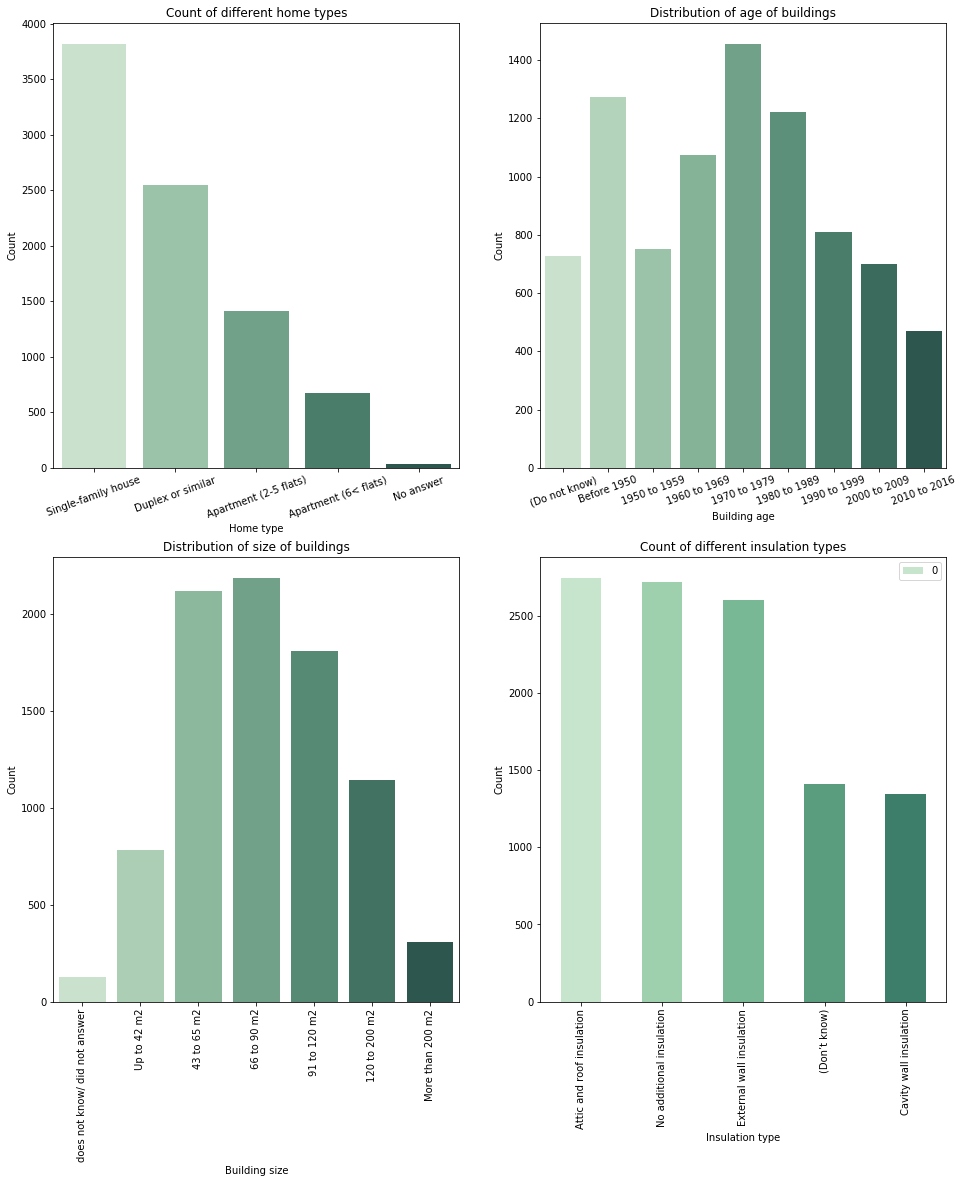

In [14]:
fig, axs = plt.subplots(2,2, figsize = (16,18))
sns.countplot(x='H1', data=data_main, order = data_main['H1'].value_counts().index, ax = axs[0,0], palette="ch:2.5,-.2,dark=.3")
axs[0,0].set_xticklabels(['Single-family house', 'Duplex or similar', 'Apartment (2-5 flats)', 'Apartment (6< flats)', 'No answer'], rotation=20)
axs[0,0].set_ylabel('Count')
axs[0,0].set_xlabel('Home type')
axs[0,0].set_title('Count of different home types')

sns.countplot(x='H2', data=data_main, order = ['(Do not know)', 'Before 1950', '1950 to 1959', '1960 to 1969',  
                                                   '1970 to 1979', '1980 to 1989', '1990 to 1999', '2000 to 2009', 
                                                   '2010 to 2016'], ax = axs[0,1], palette="ch:2.5,-.2,dark=.3") 
axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(),rotation=20)
axs[0,1].set_ylabel('Count')
axs[0,1].set_xlabel('Building age')
axs[0,1].set_title('Distribution of age of buildings')

sns.countplot(x='H3', data=data_main, order = ['does not know/ did not answer', 'Up to 42 m2', '43 to 65 m2', 
                                               '66 to 90 m2', '91 to 120 m2', '120 to 200 m2', 'More than 200 m2'], ax = axs[1,0], palette="ch:2.5,-.2,dark=.3") 
axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(),rotation=90)
axs[1,0].set_ylabel('Count')
axs[1,0].set_xlabel('Building size')
axs[1,0].set_title('Distribution of size of buildings')

insulation.sort_values(by = 0, ascending = False).plot.bar(ax = axs[1,1], color = [sns.color_palette("ch:2.5,-.2,dark=.3")])
axs[1,1].set_ylabel('Count')
axs[1,1].set_xlabel('Insulation type')
axs[1,1].set_title('Count of different insulation types');

### Social characteristics

In [15]:
data_main['household_members'] = data_main['S1Ac1'] + data_main['S1Ac2'] + data_main['S1Ac3'] + data_main['S1Bc1'] + data_main['S1Bc2'] + data_main['S1Bc3'] 
data_main['children'] = data_main['S1Ac1'] + data_main['S1Bc1']
data_main['middle_aged'] = data_main['S1Ac2'] + data_main['S1Bc2'] 
data_main['elderly'] = data_main['S1Ac3'] + data_main['S1Bc3']
data_main['resp_age'] = 2018-data_main['S4']

data_main['income_decile'] = np.nan
for row in range(len(data_main)):
    if (data_main['S9MONTH'].iloc[row] == 'Bracket 1') | (data_main['S9MONTH'].iloc[row] == 'Bracket 2') | \
    (data_main['S9YEAR'].iloc[row] == 'Bracket 1' )| (data_main['S9YEAR'].iloc[row] == 'Bracket 2'):
        data_main['income_decile'].iloc[row]  = 'Poor'
    elif (data_main['S9MONTH'].iloc[row] == 'Bracket 3') | (data_main['S9MONTH'].iloc[row] == 'Bracket 4') | \
    (data_main['S9YEAR'].iloc[row] == 'Bracket 3') | (data_main['S9YEAR'].iloc[row] == 'Bracket 4'):
        data_main['income_decile'].iloc[row]  = 'Low income'
    elif (data_main['S9MONTH'].iloc[row] == 'Bracket 5') | (data_main['S9MONTH'].iloc[row] == 'Bracket 6') | \
    (data_main['S9YEAR'].iloc[row] == 'Bracket 5') | (data_main['S9YEAR'].iloc[row] == 'Bracket 6'):
        data_main['income_decile'].iloc[row]  = 'Lower middle income'
    elif (data_main['S9MONTH'].iloc[row] == 'Bracket 7') | (data_main['S9MONTH'].iloc[row] == 'Bracket 8') | \
    (data_main['S9YEAR'].iloc[row] == 'Bracket 7') | (data_main['S9YEAR'].iloc[row] == 'Bracket 8'):
        data_main['income_decile'].iloc[row]  = 'Upper middle income'
    elif (data_main['S9MONTH'].iloc[row] == 'Bracket 9') | (data_main['S9MONTH'].iloc[row] == 'Bracket 10') | \
    (data_main['S9YEAR'].iloc[row] == 'Bracket 9') | (data_main['S9YEAR'].iloc[row] == 'Bracket 10'):
        data_main['income_decile'].iloc[row]  = 'High income'
    elif (data_main['S9MONTH'].iloc[row] == 'Refused to answer') | (data_main['S9YEAR'].iloc[row] == 'Refused to answer'):
        data_main['income_decile'].iloc[row]  = 'Refused to answer'
               
        
data_main['income_dec_num'] = np.nan
for row in range(len(data_main)):
    if (data_main['S9MONTH'].iloc[row] == 'Bracket 1') | (data_main['S9MONTH'].iloc[row] == 'Bracket 2') | \
    (data_main['S9YEAR'].iloc[row] == 'Bracket 1' )| (data_main['S9YEAR'].iloc[row] == 'Bracket 2'):
        data_main['income_dec_num'].iloc[row]  = 1
    elif (data_main['S9MONTH'].iloc[row] == 'Bracket 3') | (data_main['S9MONTH'].iloc[row] == 'Bracket 4') | \
    (data_main['S9YEAR'].iloc[row] == 'Bracket 3') | (data_main['S9YEAR'].iloc[row] == 'Bracket 4'):
        data_main['income_dec_num'].iloc[row]  = 2
    elif (data_main['S9MONTH'].iloc[row] == 'Bracket 5') | (data_main['S9MONTH'].iloc[row] == 'Bracket 6') | \
    (data_main['S9YEAR'].iloc[row] == 'Bracket 5') | (data_main['S9YEAR'].iloc[row] == 'Bracket 6'):
        data_main['income_dec_num'].iloc[row]  = 3
    elif (data_main['S9MONTH'].iloc[row] == 'Bracket 7') | (data_main['S9MONTH'].iloc[row] == 'Bracket 8') | \
    (data_main['S9YEAR'].iloc[row] == 'Bracket 7') | (data_main['S9YEAR'].iloc[row] == 'Bracket 8'):
        data_main['income_dec_num'].iloc[row]  = 4
    elif (data_main['S9MONTH'].iloc[row] == 'Bracket 9') | (data_main['S9MONTH'].iloc[row] == 'Bracket 10') | \
    (data_main['S9YEAR'].iloc[row] == 'Bracket 9') | (data_main['S9YEAR'].iloc[row] == 'Bracket 10'):
        data_main['income_dec_num'].iloc[row]  = 5
    elif (data_main['S9MONTH'].iloc[row] == 'Refused to answer') | (data_main['S9YEAR'].iloc[row] == 'Refused to answer'):
        data_main['income_dec_num'].iloc[row]  = np.nan
        
        
data_main['income_dec_num10'] = np.nan
for row in range(len(data_main)):
    if (data_main['S9MONTH'].iloc[row] == 'Bracket 1') |  \
    (data_main['S9YEAR'].iloc[row] == 'Bracket 1' ):
        data_main['income_dec_num10'].iloc[row]  = 1
        
    elif (data_main['S9MONTH'].iloc[row] == 'Bracket 2') | \
    (data_main['S9YEAR'].iloc[row] == 'Bracket 2'):
        data_main['income_dec_num10'].iloc[row]  = 2
        
    elif (data_main['S9MONTH'].iloc[row] == 'Bracket 3') | \
    (data_main['S9YEAR'].iloc[row] == 'Bracket 3'):
        data_main['income_dec_num10'].iloc[row]  = 3 
        
    elif (data_main['S9MONTH'].iloc[row] == 'Bracket 4') | \
    (data_main['S9YEAR'].iloc[row] == 'Bracket 4'):
        data_main['income_dec_num10'].iloc[row]  = 4          

    elif (data_main['S9MONTH'].iloc[row] == 'Bracket 5') | \
    (data_main['S9YEAR'].iloc[row] == 'Bracket 5'):
        data_main['income_dec_num10'].iloc[row]  = 5       

    elif (data_main['S9MONTH'].iloc[row] == 'Bracket 6') | \
    (data_main['S9YEAR'].iloc[row] == 'Bracket 6'):
        data_main['income_dec_num10'].iloc[row]  = 6    

    elif (data_main['S9MONTH'].iloc[row] == 'Bracket 7') | \
    (data_main['S9YEAR'].iloc[row] == 'Bracket 7'):
        data_main['income_dec_num10'].iloc[row]  = 7    
        
    elif (data_main['S9MONTH'].iloc[row] == 'Bracket 8') | \
    (data_main['S9YEAR'].iloc[row] == 'Bracket 8'):
        data_main['income_dec_num10'].iloc[row]  = 8    
        
    elif (data_main['S9MONTH'].iloc[row] == 'Bracket 9') | \
    (data_main['S9YEAR'].iloc[row] == 'Bracket 9'):
        data_main['income_dec_num10'].iloc[row]  = 9    
        
    elif (data_main['S9MONTH'].iloc[row] == 'Bracket 10') | \
    (data_main['S9YEAR'].iloc[row] == 'Bracket 10'):
        data_main['income_dec_num10'].iloc[row]  = 10   
        
    elif (data_main['S9MONTH'].iloc[row] == 'Refused to answer') | (data_main['S9YEAR'].iloc[row] == 'Refused to answer'):
        data_main['income_dec_num10'].iloc[row]  = np.nan
        
data_main['income_feel'] = np.nan
for row in range(len(data_main)):
    if data_main['S8'].iloc[row] == 'Finding it very difficult on present income':
        data_main['income_feel'].iloc[row]  = 0
    elif data_main['S8'].iloc[row] == 'Finding it difficult on present income':
        data_main['income_feel'].iloc[row]  = 1
    elif data_main['S8'].iloc[row] == 'Coping on present income':
        data_main['income_feel'].iloc[row]  = 2
    elif data_main['S8'].iloc[row] == 'Living comfortably on present income':
        data_main['income_feel'].iloc[row]  = 3
    else:
        data_main['income_feel'].iloc[row]  = np.nan

data_main['gender'] = np.nan
for row in range(len(data_main)):
    if data_main['S5'].iloc[row] == 'Male':
        data_main['gender'].iloc[row]  = 0
    elif data_main['S5'].iloc[row] == 'Female':
        data_main['gender'].iloc[row]  = 1
    else:
        data_main['gender'].iloc[row]  = np.nan

In [16]:
data_main['education'] = np.nan
for row in range(len(data_main)):
    if data_main['S2'].iloc[row] == 'No formal education or below primary':
        data_main['education'].iloc[row]  = 0
    elif data_main['S2'].iloc[row] == 'Primary education':
        data_main['education'].iloc[row]  = 1
    elif data_main['S2'].iloc[row] == 'Secondary  and post-secondary non-tertiary education':
        data_main['education'].iloc[row]  = 2
    elif data_main['S2'].iloc[row] == 'Tertiary education first stage, i.e. bachelor or master':
        data_main['education'].iloc[row]  = 3
    elif data_main['S2'].iloc[row] == 'Tertiary education second stage (PhD)':
        data_main['education'].iloc[row]  = 4
    elif data_main['S2'].iloc[row] == 'Do not know / Refusal':
        data_main['education'].iloc[row]  = np.nan

In [17]:
data_main["rural"] = np.where(
    (data_main["S6"] == "The suburbs or outskirts of a big city")
    | (data_main["S6"] == "A big city (more than 0,5 mln people)"), 0,1
)
data_main.loc[data_main["S6"].isna(), "rural"] = np.nan

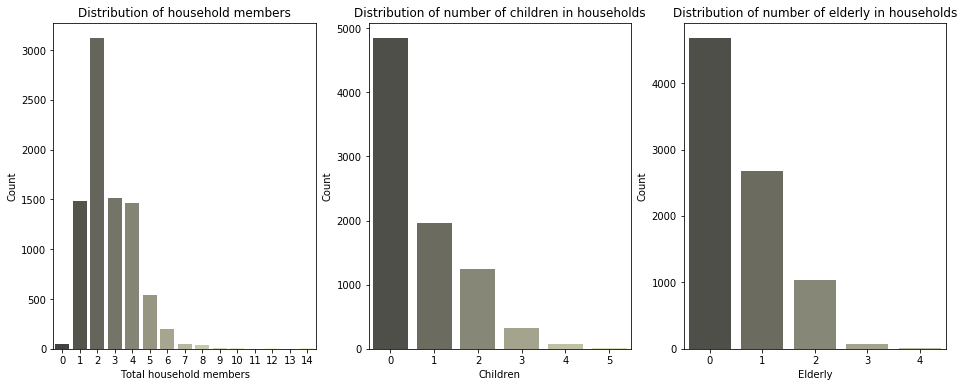

In [18]:
fig, axs = plt.subplots(1,3, figsize = (16,6))
sns.countplot(x = 'household_members', data = data_main, ax = axs[0], palette="Pastel1_d")
axs[0].set_xticklabels(['{:.0f}'.format(float(t.get_text())) for t in axs[0].get_xticklabels()])
axs[0].set_xlim(-0.5,14.5)
axs[0].set_ylabel('Count')
axs[0].set_xlabel('Total household members')
axs[0].set_title('Distribution of household members')

sns.countplot(x = 'children', data = data_main, ax = axs[1], palette="Pastel1_d")
axs[1].set_xticklabels(['{:.0f}'.format(float(t.get_text())) for t in axs[1].get_xticklabels()])
axs[1].set_xlim(-0.5,5.5)
axs[1].set_ylabel('Count')
axs[1].set_xlabel('Children')
axs[1].set_title('Distribution of number of children in households')

sns.countplot(x = 'elderly', data = data_main, ax = axs[2], palette="Pastel1_d")
axs[2].set_xticklabels(['{:.0f}'.format(float(t.get_text())) for t in axs[2].get_xticklabels()])
axs[2].set_xlim(-0.5,4.5)
axs[2].set_ylabel('Count')
axs[2].set_xlabel('Elderly')
axs[2].set_title('Distribution of number of elderly in households');


Text(0.5, 1.0, 'Home type of respondents')

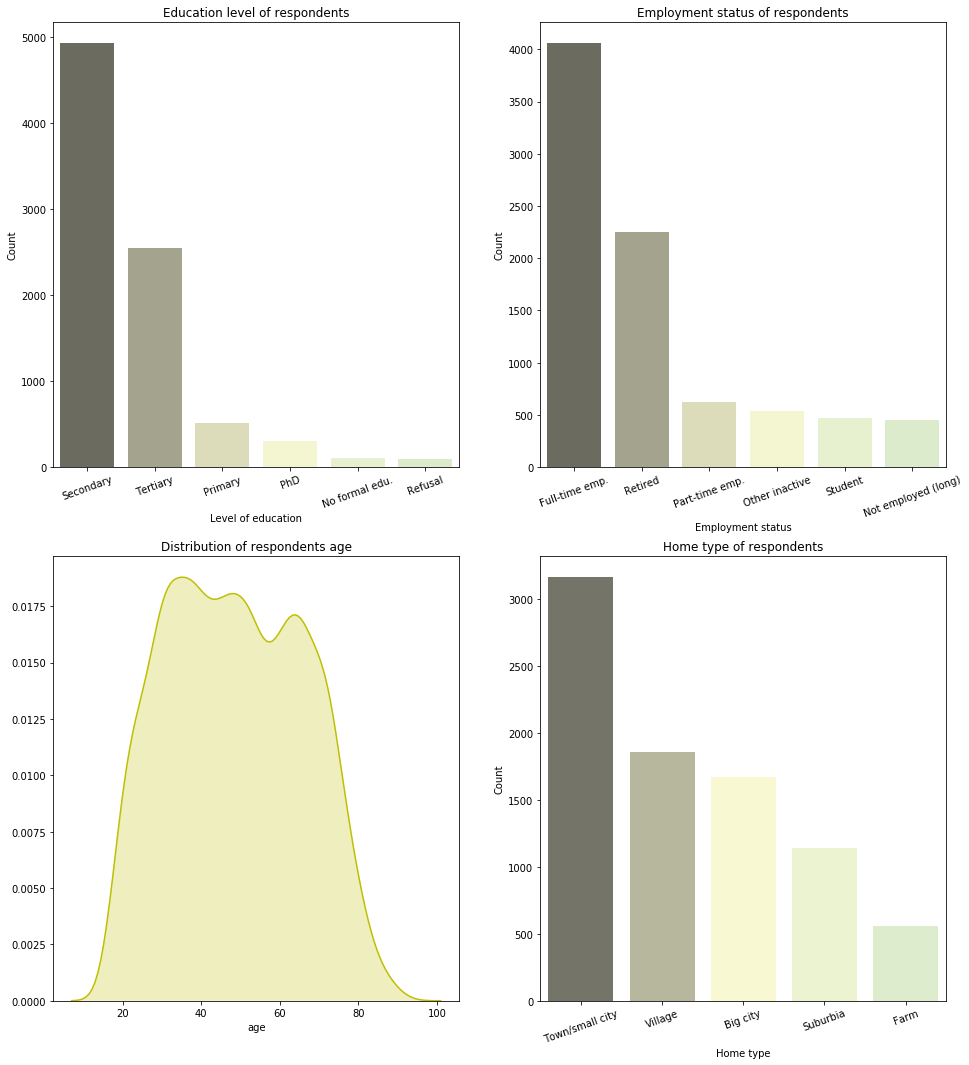

In [19]:
fig, axs = plt.subplots(2,2, figsize = (16,18))
sns.countplot(x='S2', data=data_main, order = data_main['S2'].value_counts().index, ax = axs[0,0], palette="Pastel1_d")
axs[0,0].set_xticklabels(['Secondary', 'Tertiary', 'Primary', 'PhD', 'No formal edu.', 'Refusal'],rotation=20)
axs[0,0].set_ylabel('Count')
axs[0,0].set_xlabel('Level of education')
axs[0,0].set_title('Education level of respondents')

sns.countplot(x='S3', data=data_main, order = data_main['S3'].value_counts().index, ax = axs[0,1], palette="Pastel1_d")
axs[0,1].set_xticklabels(['Full-time emp.', 'Retired', 'Part-time emp.', 'Other inactive', 'Student', 
                          'Not employed (long)', "Refuse"],rotation=20)
axs[0,1].set_ylabel('Count')
axs[0,1].set_xlabel('Employment status')
axs[0,1].set_title('Employment status of respondents')

sns.distplot(data_main['resp_age'].dropna(), ax = axs[1,0],hist=False, color="y", kde_kws={"shade": True})
axs[1,0].set_xlabel('age')
axs[1,0].set_title('Distribution of respondents age')

sns.countplot(x='S6', data=data_main, order = data_main['S6'].value_counts().index, ax = axs[1,1], palette="Pastel1_d")
axs[1,1].set_xticklabels(['Town/small city', 'Village', 'Big city', 'Suburbia', 'Farm', 'Refuse'],rotation=20)
axs[1,1].set_ylabel('Count')
axs[1,1].set_xlabel('Home type')
axs[1,1].set_title('Home type of respondents')


Text(0.5, 1.0, 'Income group of respondents')

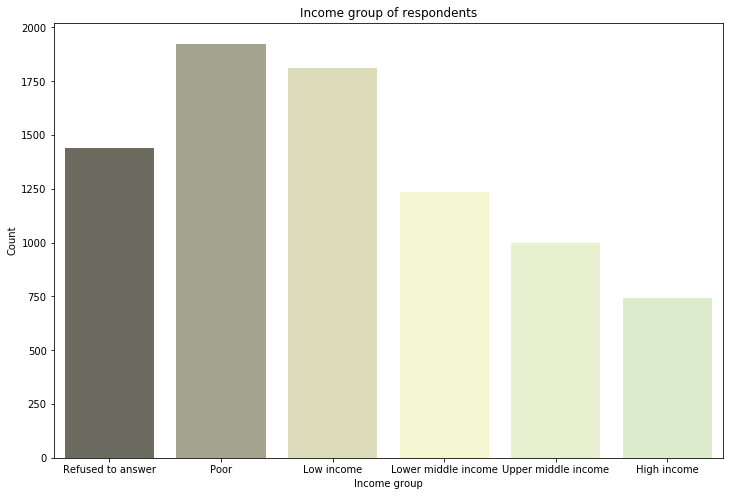

In [20]:
plt.figure(figsize = (12,8))
ax = sns.countplot(x='income_decile', data=data_main, order =['Refused to answer', 'Poor', 'Low income', 'Lower middle income',
                                                             'Upper middle income', 'High income'],palette="Pastel1_d")
ax.set_ylabel('Count')
ax.set_xlabel('Income group')
ax.set_title('Income group of respondents')


In [21]:
#data_main.groupby(['Country', 'income_decile'])['income_decile'].count().head(50)

In [22]:
data_main['resp_age_group'] = np.nan
for i in range(len(data_main)):
    if data_main['resp_age'].iloc[i] <= 40:
        #print(data_main['resp_age'].iloc[i])
        data_main['resp_age_group'].iloc[i] = 'Young'
    elif (data_main['resp_age'].iloc[i] >= 41) & (data_main['resp_age'].iloc[i] <= 60):
        data_main['resp_age_group'].iloc[i] = 'Middle age' 
    elif (data_main['resp_age'].iloc[i] >= 61):
        data_main['resp_age_group'].iloc[i] = 'Old' 
    else:
        data_main['resp_age_group'].iloc[i] = np.nan
        
        
data_main['resp_age_bins'] = np.nan
for i in range(len(data_main)):
    if data_main['resp_age'].iloc[i] <= 39:
        #print(data_main['resp_age'].iloc[i])
        data_main['resp_age_bins'].iloc[i] = '30-39'
    elif (data_main['resp_age'].iloc[i] >= 40) & (data_main['resp_age'].iloc[i] <= 49):
        data_main['resp_age_bins'].iloc[i] = '40-49' 
    elif (data_main['resp_age'].iloc[i] >= 50) & (data_main['resp_age'].iloc[i] <= 59):
        data_main['resp_age_bins'].iloc[i] = '50-59' 
    elif (data_main['resp_age'].iloc[i] >= 60) & (data_main['resp_age'].iloc[i] <= 69):
        data_main['resp_age_bins'].iloc[i] = '60-69'
    elif (data_main['resp_age'].iloc[i] >= 70) & (data_main['resp_age'].iloc[i] <= 79):
        data_main['resp_age_bins'].iloc[i] = '70-79' 
    elif (data_main['resp_age'].iloc[i] >= 80) & (data_main['resp_age'].iloc[i] <= 93):
        data_main['resp_age_bins'].iloc[i] = '80-93' 
    else:
        data_main['resp_age_bins'].iloc[i] = np.nan

C:\Users\T440s\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


### Energy cost

In [23]:
data_main['electricity_cost_monthly'] = data_main['H8A']/data_main['Currency_toeur']
data_main['heating_cost_yearly'] = (data_main['H7A1']*data_main['H7AA'])/data_main['Currency_toeur'] #Not too usable

In [24]:
data_main['heating_cost_yearly'].dropna().count()

3207

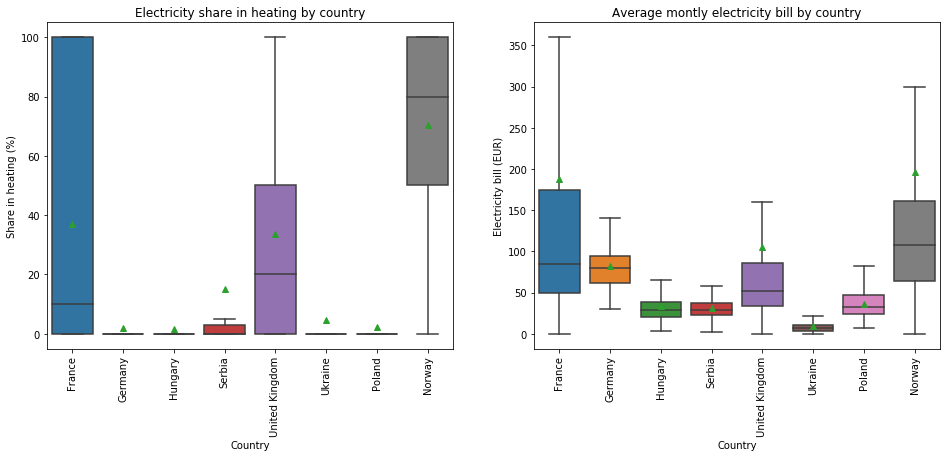

<Figure size 720x432 with 0 Axes>

In [25]:
fig, axs = plt.subplots(1,2, figsize = (16,6))
plt.figure(figsize = (10,6))
sns.boxplot(data=data_main, y='H6A1', x='Country', showfliers=False, showmeans=True, ax = axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation=90)
axs[0].set_ylabel('Share in heating (%)')
axs[0].set_title('Electricity share in heating by country')

sns.boxplot(data=data_main, y='electricity_cost_monthly', x='Country', showfliers=False, showmeans=True, ax = axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation=90)
axs[1].set_ylabel('Electricity bill (EUR)')
axs[1].set_title('Average montly electricity bill by country');

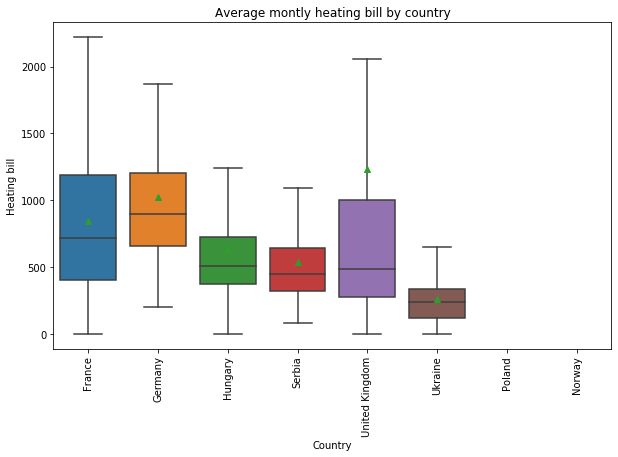

In [26]:

plt.figure(figsize = (10,6))
ax = sns.boxplot(data=data_main, y='heating_cost_yearly', x='Country', showfliers=False, showmeans=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel('Heating bill')
ax.set_title('Average montly heating bill by country');

### Appliances

In [27]:
data_main['appliance_age_avg'] = np.nan
def age_count(df):
    appliance = ['H11A', 'H11B', 'H11C', 'H11D', 'H11E', 'H11F', 'H11G', 'H11H']
    age = 0
    no_app = 0

    for i in appliance:
        if df[i] == 'Up to 3 years old':
            age += 1
        elif df[i] == '4-10 years old':
            age += 2
        elif df[i] == 'Older than 10 years':
            age += 3
        elif (df[i] == 'Do not have') | (pd.isnull(df[i])):
            #print(df[i])
            no_app += 1

    if no_app < len(appliance):
        return age/(len(appliance)-no_app)
    elif no_app == len(appliance):
        return np.nan


data_main['appliance_age_avg'] = data_main.apply(age_count, axis=1)

Text(0.5, 1.0, 'Distribtuon of appliance average age by country')

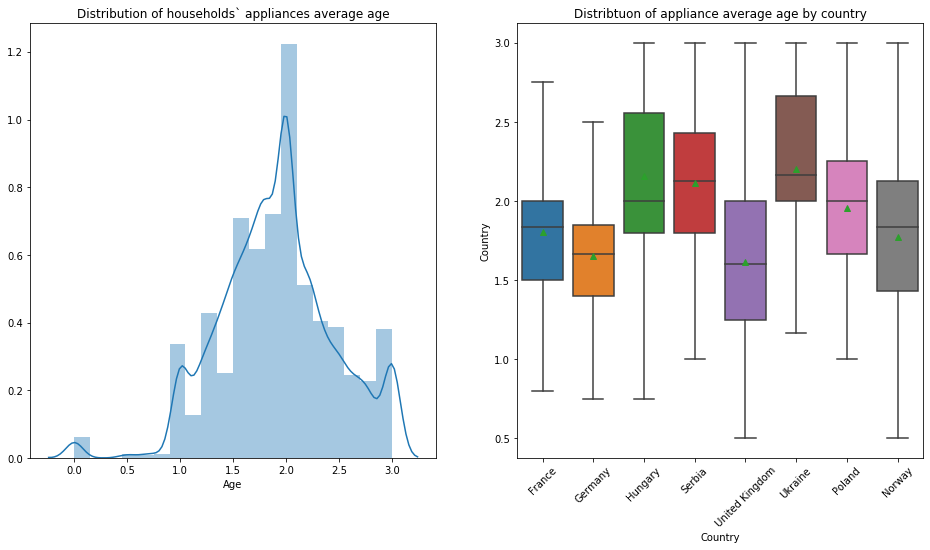

In [28]:
fig, axs = plt.subplots(1,2, figsize = (16,8))

sns.distplot(data_main['appliance_age_avg'].dropna(), ax = axs[0], bins = 20)

axs[0].set_xlabel('Age')
axs[0].set_title('Distribution of households` appliances average age')


sns.boxplot(data=data_main, y='appliance_age_avg', x='Country', showfliers=False, showmeans=True, ax = axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation=45)
axs[1].set_ylabel('Country')
axs[1].set_title('Distribtuon of appliance average age by country')

In [29]:
#translate it to percentages
data_main['ef_bulbs'] = np.nan
for row in range(len(data_main)):
    if data_main['H12A'].iloc[row] == 'nan':
        data_main['ef_bulbs'].iloc[row]  =  np.nan
    elif data_main['H12B'].iloc[row] == 'All':
        data_main['ef_bulbs'].iloc[row]  =  1
    elif data_main['H12B'].iloc[row] == 'Most':
        data_main['ef_bulbs'].iloc[row]  =  0.75      
    elif data_main['H12B'].iloc[row] == 'About half':
        data_main['ef_bulbs'].iloc[row]  =  0.5     
    elif data_main['H12B'].iloc[row] == 'Some':
        data_main['ef_bulbs'].iloc[row]  =  0.25
    elif data_main['H12B'].iloc[row] == 'None':
        data_main['ef_bulbs'].iloc[row]  =  0

C:\Users\T440s\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
smart_meter = pd.DataFrame.from_dict({'Electricity smart meter': data_main['H13A'][data_main['H13A'] == 'Yes'].count(),
                                     'Gas smart meter': data_main['H13B'][data_main['H13B'] == 'Yes'].count(), 
                                     'Heating smart meter': data_main['H13C'][data_main['H13C'] == 'Yes'].count()}, orient='index')

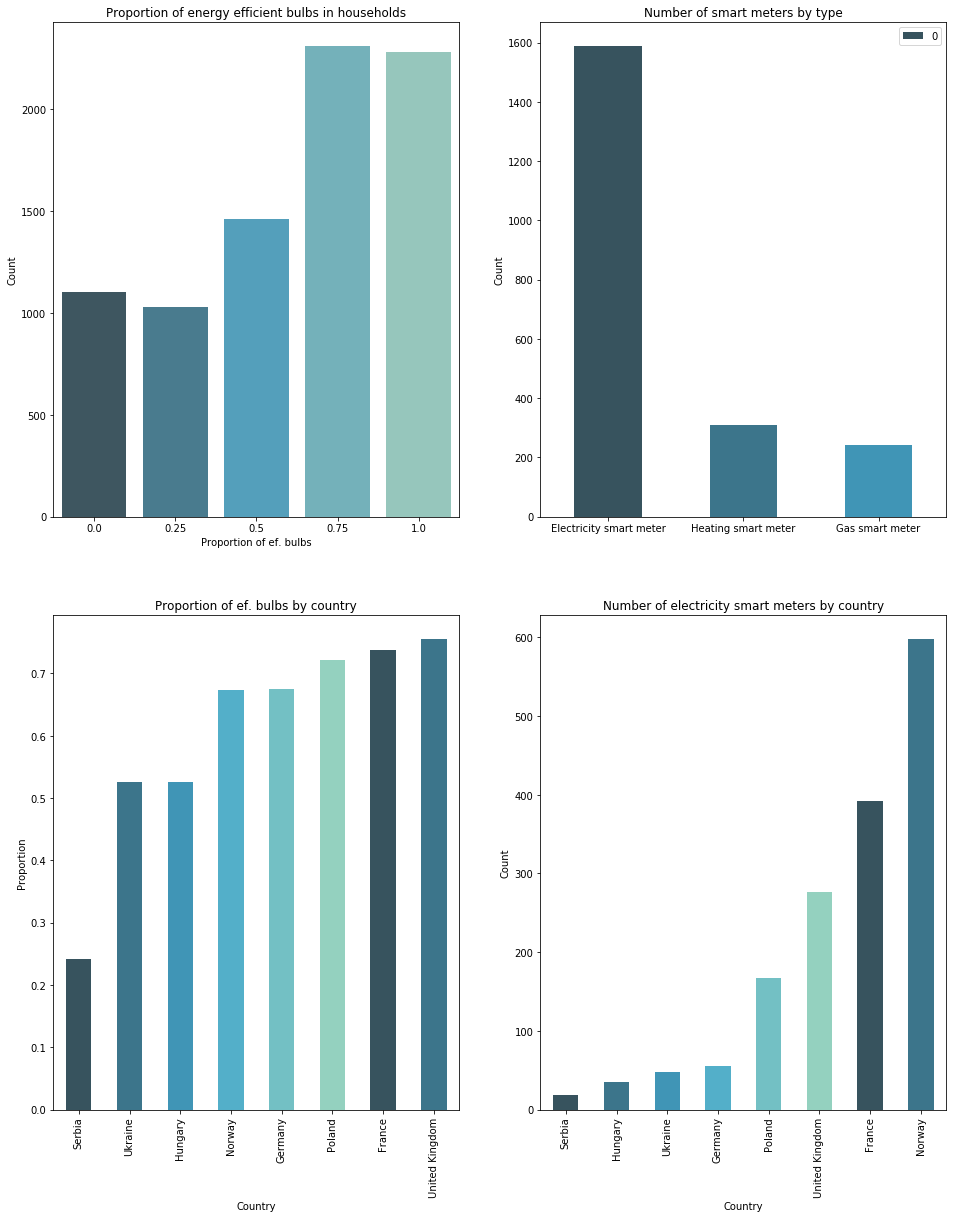

In [31]:
fig, axs = plt.subplots(2,2, figsize = (16,20))
sns.countplot(x='ef_bulbs', data=data_main, ax = axs[0,0], palette="GnBu_d")
axs[0,0].set_xlabel('Proportion of ef. bulbs')
axs[0,0].set_ylabel('Count')
axs[0,0].set_title('Proportion of energy efficient bulbs in households')

smart_meter.sort_values(by = 0, ascending = False).plot.bar(ax = axs[0,1], color = [sns.color_palette("GnBu_d")])
axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(),rotation=0)
axs[0,1].set_ylabel('Count')
axs[0,1].set_title('Number of smart meters by type')

data_main.groupby('Country')['ef_bulbs'].mean().sort_values().plot.bar(ax = axs[1,0], color = [(0.21697808535178778, 0.3273356401384083, 0.36941176470588233), (0.23442778418556967, 0.4582083813917724, 0.5435294117647058), (0.25140586953735744, 0.5855440215301807, 0.7129411764705882), (0.3248084070229399, 0.6849314366269383, 0.7899474561066256), (0.45066769191336664, 0.7509983339741125, 0.7703857490708702), (0.5800230680507498, 0.8189004229142638, 0.7502806612841215)])
axs[1,0].set_ylabel('Proportion')
axs[1,0].set_title('Proportion of ef. bulbs by country')

data_main[data_main['H13A'] == 'Yes'].groupby('Country')['H13A'].count().sort_values().plot.bar(ax = axs[1,1], color = [(0.21697808535178778, 0.3273356401384083, 0.36941176470588233), (0.23442778418556967, 0.4582083813917724, 0.5435294117647058), (0.25140586953735744, 0.5855440215301807, 0.7129411764705882), (0.3248084070229399, 0.6849314366269383, 0.7899474561066256), (0.45066769191336664, 0.7509983339741125, 0.7703857490708702), (0.5800230680507498, 0.8189004229142638, 0.7502806612841215)])
axs[1,1].set_ylabel('Count')
axs[1,1].set_title('Number of electricity smart meters by country');

In [32]:
def green(df):
    if df == 'Not Mentioned':
        return 0
    elif df == 'Mentioned':
        return 1
    else:
        return np.nan

greens = ['green_1', 'green_2','green_3','green_4','green_5']
green_orig = ['G1A1', 'G1A2','G1A3','G1A4','G1A5']

for a,b in zip(greens, green_orig):
    data_main[a] = data_main[b].apply(green)

In [33]:
data_main.groupby('Country')[['green_1', 'green_2','green_3','green_4','green_5']].agg({'mean', 'count', 'median'})

green_1                green_2                green_3        \
                    mean count median      mean count median      mean count   
Country                                                                        
France          0.186667  1500      0  0.384000  1500      0  0.577333  1500   
Germany         0.333333   711      0  0.566807   711      1  0.798875   711   
Hungary         0.075342  1022      0  0.131115  1022      0  0.500978  1022   
Norway          0.285012  1221      0  0.457821  1221      0  0.416052  1221   
Poland          0.101000  1000      0  0.189000  1000      0  0.391000  1000   
Serbia          0.102000  1000      0  0.207000  1000      0  0.245000  1000   
Ukraine         0.075173  1011      0  0.081108  1011      0  0.460930  1011   
United Kingdom  0.198030  1015      0  0.311330  1015      0  0.536946  1015   

                        green_4                green_5               
               median      mean count median      mean count median  
Country                                                              
France              1  0.103333  1500    0.0  0.201333  1500      0  
Germany             1  0.073136   711    0.0  0.054852   711      0  
Hungary             1       NaN     0    NaN  0.413894  1022      0  
Norway              0       NaN     0    NaN  0.234234  1221      0  
Poland              0  0.008000  1000    0.0  0.523000  1000      1  
Serbia              0  0.000000  1000    0.0  0.579000  1000      1  
Ukraine             0  0.000000  1011    0.0  0.463897  1011      0  
United Kingdom      1  0.159606  1015    0.0  0.289655  1015      0

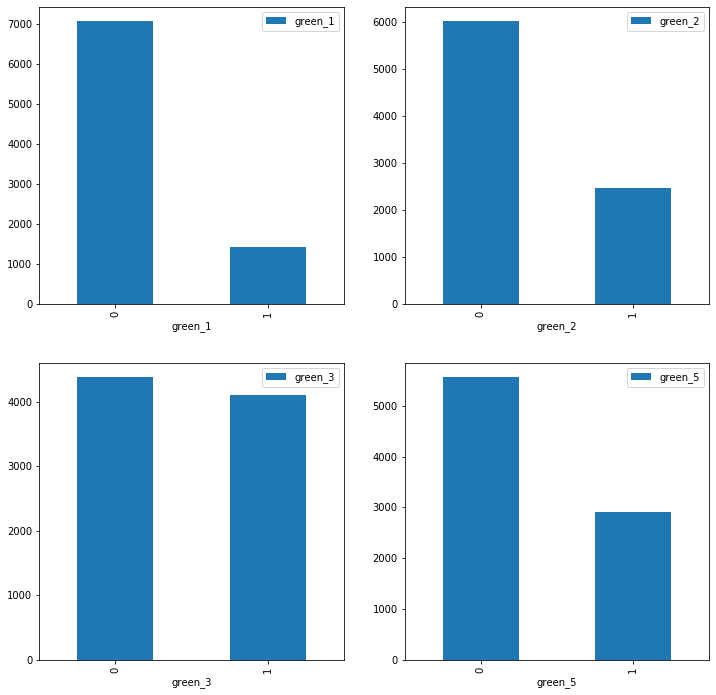

In [34]:
fig, axs = plt.subplots(2,2, figsize=(12,12))
 
greens = ['green_1', 'green_2','green_3','green_5']

for a,b,green in zip([0,0,1,1],[0,1,0,1], greens):
    data_main.groupby([green])[[green]].count().plot.bar(ax = axs[a,b]);


In [35]:
data_main["subsidy"] = np.nan
for row in range(len(data_main)):
    if (data_main["G3C"].iloc[row] == 'Yes') | (data_main["G3D"].iloc[row] == 'Yes'):
        data_main["subsidy"].iloc[row] = 1
    elif (type(data_main["G3C"].iloc[row]) == float) & (type(data_main["G3D"].iloc[row]) == float):
        data_main["subsidy"].iloc[row] = np.nan
    else:
        data_main["subsidy"].iloc[row] = 0

C:\Users\T440s\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


### Attitudes

In [36]:
def attitude(df1):
    
    if df1 == 'Strongly agree':
        return 4
    elif df1 == 'Agree':
        return 3
    elif df1 == 'Disagree':
        return 2
    elif df1 == 'Strongly disagree':
        return 1
    elif pd.isnull(df1):
        return np.nan

attitude_list = ['not_willing', 'overstated_imp', 'job_of_future', 'willing_comp', 'no_extra_money', 'tech_prog_help',
                 'env_prot_helps_growth']
att_list = ['H15A','H15B','H15C','H15D','H15E','H15F','H15G']

for a,b in zip(attitude_list, att_list):
    data_main[a] =  data_main[b].apply(attitude)

data_main[['not_willing', 'overstated_imp', 'job_of_future', 'willing_comp', 'no_extra_money', 'tech_prog_help',
                 'env_prot_helps_growth']] = data_main[['not_willing', 'overstated_imp', 'job_of_future', 'willing_comp', 'no_extra_money', 'tech_prog_help',
                 'env_prot_helps_growth']].astype('float')

In [37]:
data_main.groupby('Country')[['not_willing', 'overstated_imp', 'job_of_future', 'willing_comp', 'no_extra_money', 'tech_prog_help',
                  'env_prot_helps_growth']].agg({'mean', 'count', 'median'})

not_willing              overstated_imp               \
                      mean count median           mean count median   
Country                                                               
France            2.052338  1433    2.0       2.165948  1392    2.0   
Germany           1.775072   698    2.0       1.936261   706    2.0   
Hungary           1.556107  1007    1.0       2.042339   992    2.0   
Norway            1.917857  1120    2.0       2.102230  1076    2.0   
Poland            2.363538   927    2.0       2.387486   911    2.0   
Serbia            2.126283   974    2.0       2.204521   929    2.0   
Ukraine           1.899233   913    2.0       2.080226   885    2.0   
United Kingdom    1.955867   929    2.0       2.230947   866    2.0   

               job_of_future              willing_comp  ...         \
                        mean count median         mean  ... median   
Country                                                 ...          
France              2.007703  1428    2.0     3.152982  ...    3.0   
Germany             1.478014   705    1.0     3.330028  ...    3.0   
Hungary             1.988142  1012    2.0     3.052314  ...    3.0   
Norway              1.589065  1134    2.0     2.986474  ...    3.0   
Poland              2.242812   939    2.0     2.894794  ...    3.0   
Serbia              2.170757   978    2.0     3.013570  ...    3.0   
Ukraine             2.000000   927    2.0     2.912240  ...    3.0   
United Kingdom      1.960221   905    2.0     3.098560  ...    3.0   

               no_extra_money              tech_prog_help               \
                         mean count median           mean count median   
Country                                                                  
France               3.042090  1378    3.0       2.281419  1297    2.0   
Germany              3.064470   698    3.0       1.938053   678    2.0   
Hungary              3.282543   991    3.0       2.338983   944    2.0   
Norway               2.757236  1071    3.0       2.177118   909    2.0   
Poland               2.951902   894    3.0       2.784651   873    3.0   
Serbia               3.166857   875    3.0       2.784983   879    3.0   
Ukraine              3.236814   929    3.0       2.792638   815    3.0   
United Kingdom       3.034792   891    3.0       2.439181   781    2.0   

               env_prot_helps_growth               
                                mean count median  
Country                                            
France                      2.997713  1312    3.0  
Germany                     2.422680   679    3.0  
Hungary                     2.883878   887    3.0  
Norway                      2.977387   796    3.0  
Poland                      2.892593   810    3.0  
Serbia                      2.928058   834    3.0  
Ukraine                     3.007034   853    3.0  
United Kingdom              2.958228   790    3.0  

[8 rows x 21 columns]

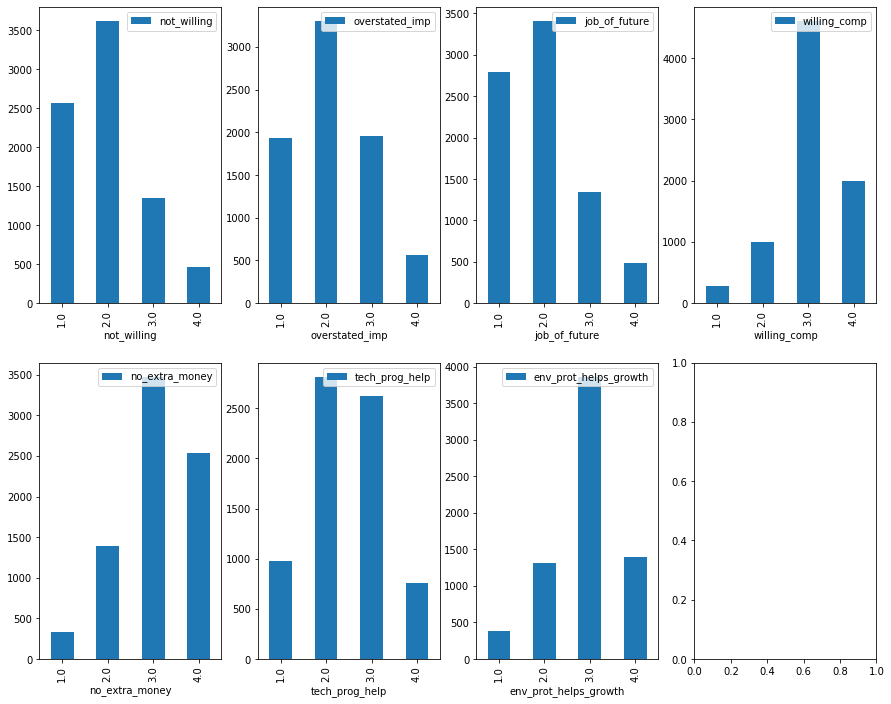

In [38]:
fig, axs = plt.subplots(2,4, figsize=(15,12))
 
attitudes = ['not_willing', 'overstated_imp', 'job_of_future', 'willing_comp', 'no_extra_money', 'tech_prog_help',
            'env_prot_helps_growth']

for a,b,att in zip([0,0,0,0,1,1,1,1],[0,1,2,3,0,1,2,3], attitudes):
    data_main.groupby([att])[[att]].count().plot.bar(ax = axs[a,b]);

In [39]:
def pol(df):
    if df == 'Not Mentioned':
        return 0
    elif df == 'Mentioned':
        return 1
    else:
        return np.nan

policy = ['policy_1', 'policy_2','policy_3','policy_4','policy_5', 'policy_6']
policy_orig = ['G2A1', 'G2A2','G2A3','G2A4','G2A5', 'G2A6']

for a,b in zip(policy, policy_orig):
    data_main[a] = data_main[b].apply(pol)

In [40]:
data_main.groupby('Country')[['policy_1', 'policy_2','policy_3','policy_4','policy_5', 'policy_6']].agg({'mean', 'count', 'median'})

policy_1               policy_2               policy_3        \
                    mean count median      mean count median      mean count   
Country                                                                        
France          0.568667  1500    1.0  0.546000  1500    1.0  0.390000  1500   
Germany         0.594937   711    1.0  0.940928   711    1.0  0.329114   711   
Hungary         0.425636  1022    0.0  0.501957  1022    1.0  0.236791  1022   
Norway               NaN     0    NaN       NaN     0    NaN       NaN     0   
Poland          0.399000  1000    0.0  0.595000  1000    1.0  0.344000  1000   
Serbia          0.407000  1000    0.0  0.693000  1000    1.0  0.290000  1000   
Ukraine         0.485658  1011    0.0  0.759644  1011    1.0  0.338279  1011   
United Kingdom  0.598030  1015    1.0  0.689655  1015    1.0  0.499507  1015   

                       policy_4               policy_5               policy_6  \
               median      mean count median      mean count median      mean   
Country                                                                         
France            0.0  0.475333  1500    0.0  0.146667  1500    0.0  0.280667   
Germany           0.0  0.260197   711    0.0       NaN     0    NaN       NaN   
Hungary           0.0  0.503914  1022    1.0  0.151663  1022    0.0  0.129159   
Norway            NaN       NaN     0    NaN       NaN     0    NaN       NaN   
Poland            0.0  0.494000  1000    0.0  0.122000  1000    0.0  0.005000   
Serbia            0.0  0.630000  1000    1.0  0.226000  1000    0.0  0.000000   
Ukraine           0.0  0.632047  1011    1.0  0.185955  1011    0.0  0.203759   
United Kingdom    0.0  0.476847  1015    0.0  0.146798  1015    0.0  0.218719   

                             
               count median  
Country                      
France          1500    0.0  
Germany            0    NaN  
Hungary         1022    0.0  
Norway             0    NaN  
Poland          1000    0.0  
Serbia          1000    0.0  
Ukraine         1011    0.0  
United Kingdom  1015    0.0

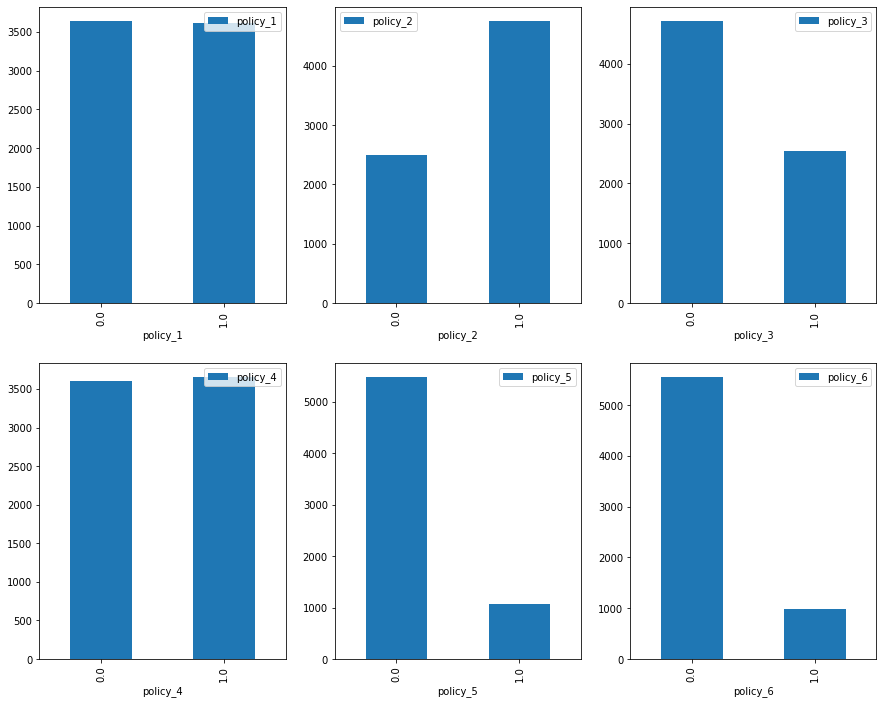

In [41]:
fig, axs = plt.subplots(2,3, figsize=(15,12))
 
policy = ['policy_1', 'policy_2','policy_3','policy_4','policy_5', 'policy_6']

for a,b,pol in zip([0,0,0,1,1,1],[0,1,2,0,1,2], policy):
    data_main.groupby([pol])[[pol]].count().plot.bar(ax = axs[a,b]);

In [42]:
def governance(df1):
    
    if df1 == '5 Totally disagree':
        return 1
    elif df1 == '2':
        return 2
    elif df1 == '3':
        return 3
    elif df1 == '4':
        return 4
    elif df1 == '1  Totally agree':
        return 5
    else:
        return np.nan

gov = ['no_car', 'res_rich', 'eff_car_smalltax', 'res_good', 'elect_car_notax']
gov_origin = ['G5A','G5B','G5C','G5D','G5E']

for a,b in zip(gov, gov_origin):
    data_main[a] =  data_main[b].apply(governance)

**Less usable = data only from Bulgaria, Germany, Serbia and UK**

In [43]:
def green(df):
    if df == 'Not Mentioned':
        return 0
    elif df == 'Mentioned':
        return 1
    else:
        return np.nan

efficient = ['eff_1', 'eff_2','eff_3','eff_4']
efficient_orig = ['E6A1', 'E6A2', 'E6A3', 'E6A4']

for a,b in zip(efficient, efficient_orig):
    data_main[a] = data_main[b].apply(green)

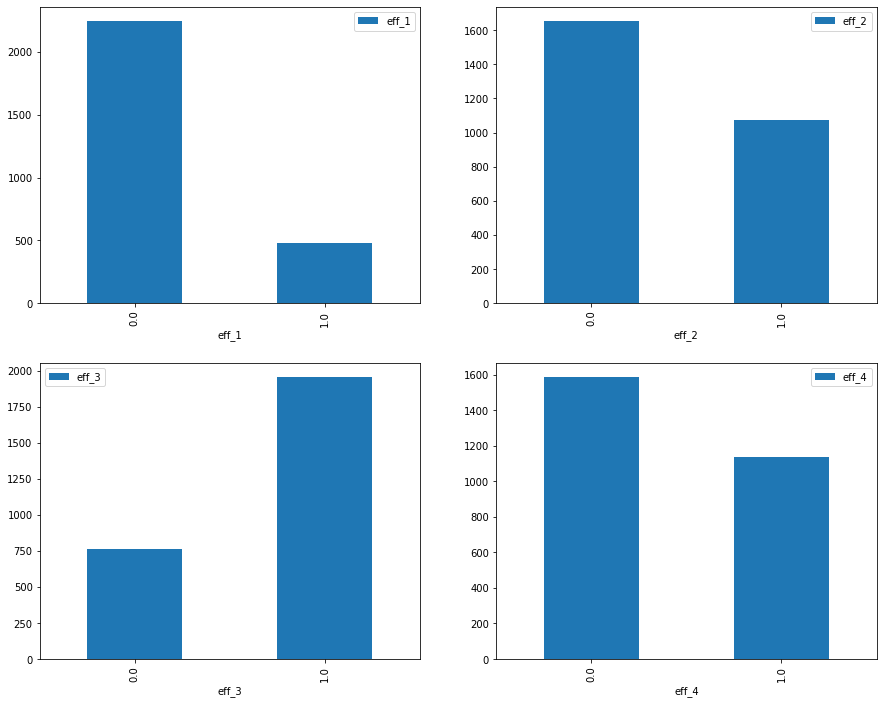

In [44]:
fig, axs = plt.subplots(2,2, figsize=(15,12))
 
policy = ['eff_1', 'eff_2','eff_3','eff_4']

for a,b,pol in zip([0,0,1,1],[0,1,0,1], policy):
    data_main.groupby([pol])[[pol]].count().plot.bar(ax = axs[a,b]);

In [45]:
data_main ['temp_ef'] = np.nan
for row in range(len(data_main)):
    if data_main['C3'].iloc[row] == 'The room temperature is the same in all the rooms.':
        data_main['temp_ef'].iloc[row]  = 0
    elif data_main['C3'].iloc[row] == 'We heat only the rooms that are in use.':
        data_main['temp_ef'].iloc[row]  = 1
    else:
        data_main['temp_ef'].iloc[row]  = np.nan

C:\Users\T440s\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


### Correlations

**1) Correlation of energy efficient tech/behaviour**

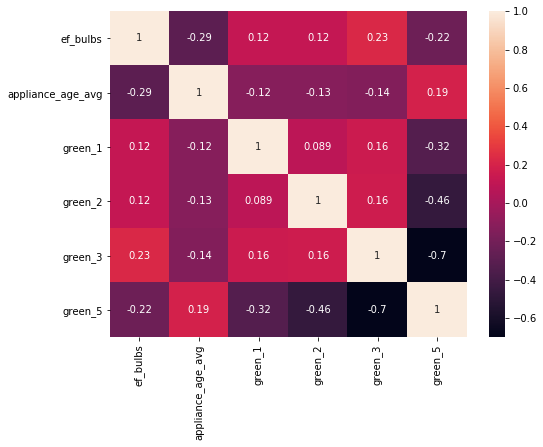

In [46]:
tech = data_main[['ef_bulbs', 'appliance_age_avg','green_1', 'green_2', 'green_3', 'green_5']]
plt.figure(figsize=(8,6))
sns.heatmap(tech.corr(), annot = True)

**2) Correlation of energy efficient attitudes**

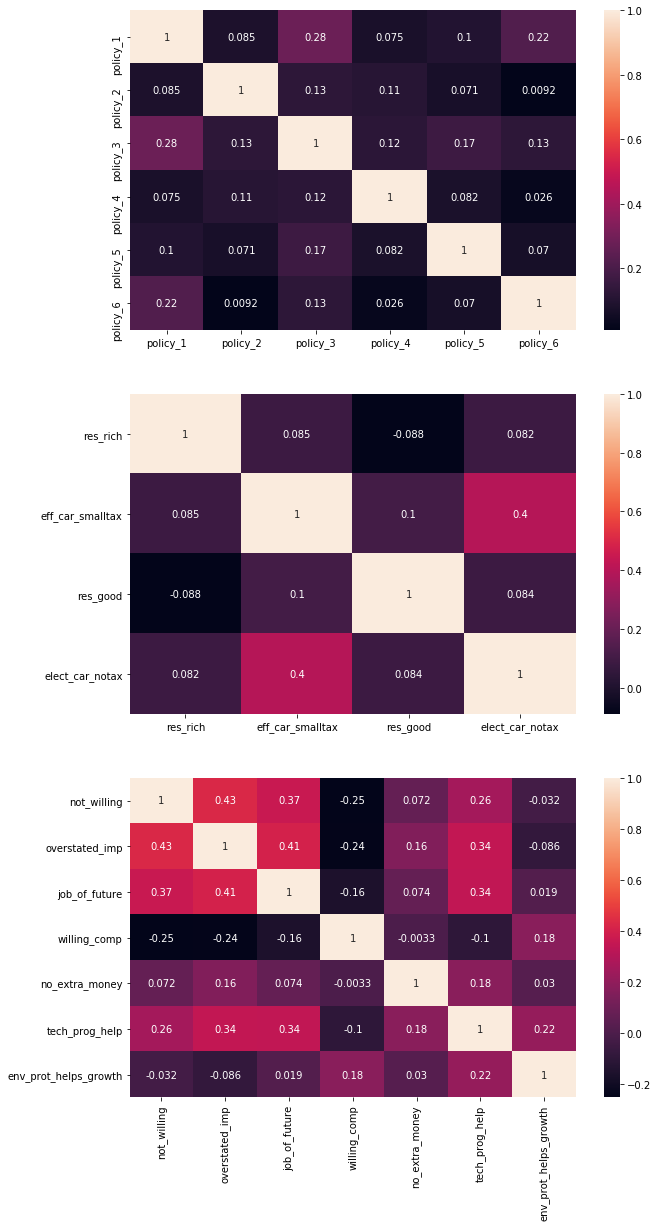

In [47]:
atti = data_main[['policy_1', 'policy_2', 'policy_3', 'policy_4', 'policy_5', 'policy_6']]
fig, axs = plt.subplots(3,1, figsize = (10,20))
sns.heatmap(atti.corr(), annot = True, ax = axs[0])

atti2 = data_main[['not_willing', 'overstated_imp', 'job_of_future', 'willing_comp', 'no_extra_money', 'tech_prog_help',
                 'env_prot_helps_growth']]
sns.heatmap(atti2.corr(), annot = True, ax = axs[2])

atti3 = data_main[['res_rich', 'eff_car_smalltax', 'res_good', 'elect_car_notax']]
sns.heatmap(atti3.corr(), annot = True, ax = axs[1])

**3) Correlation of all attitudes**

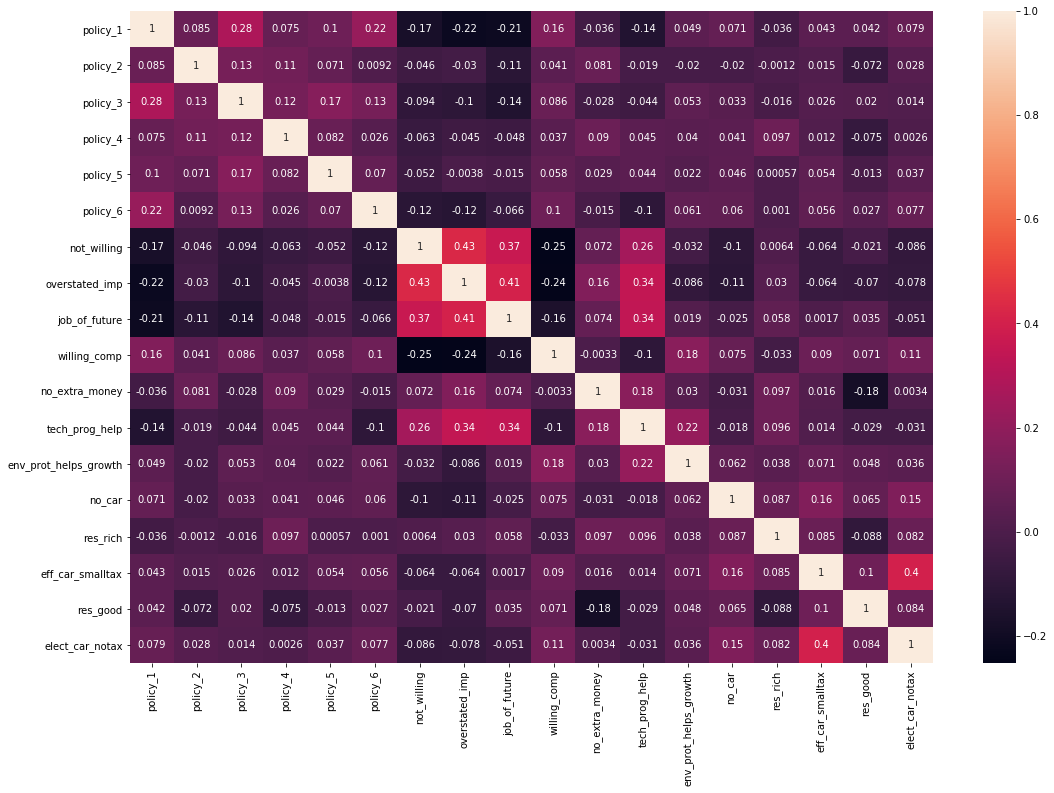

In [48]:
atti_all = data_main[['policy_1', 'policy_2', 'policy_3', 'policy_4', 'policy_5', 'policy_6',
                     'not_willing', 'overstated_imp', 'job_of_future', 'willing_comp', 'no_extra_money', 'tech_prog_help',
                 'env_prot_helps_growth', 'no_car', 'res_rich', 'eff_car_smalltax', 'res_good', 'elect_car_notax']]

plt.figure(figsize = (18,12))
sns.heatmap(atti_all.corr(), annot = True)              

**4) Correlation with efficiency measures**

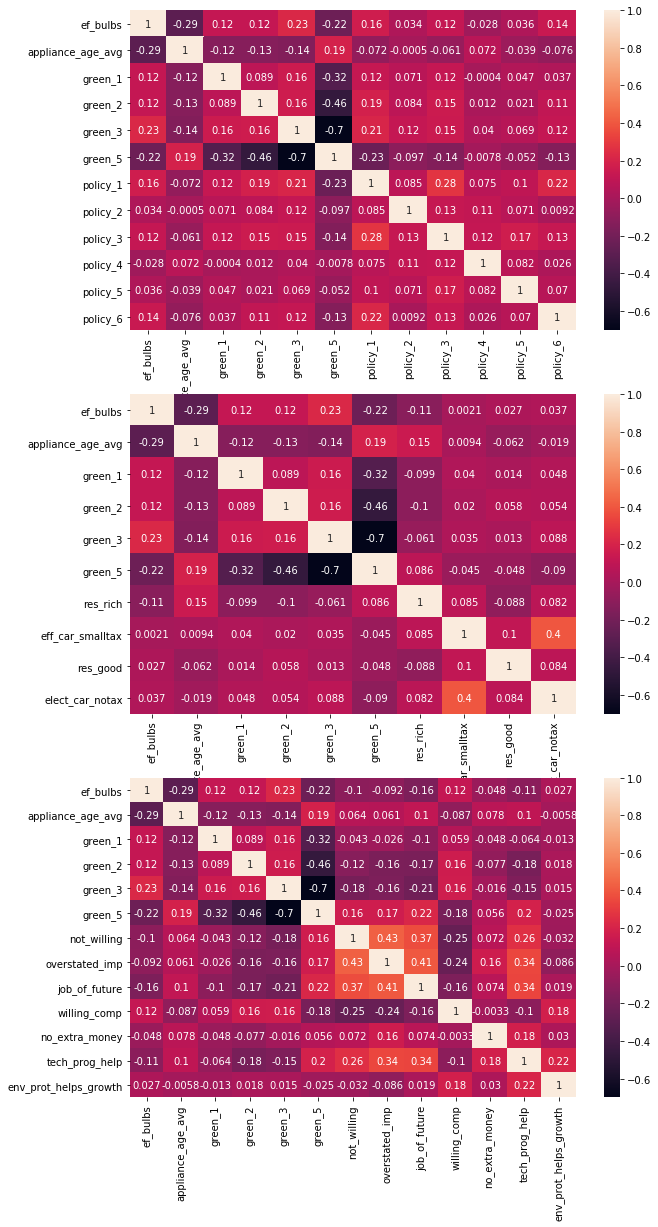

In [49]:
eff_pol = data_main[['ef_bulbs', 'appliance_age_avg','green_1', 'green_2', 'green_3', 'green_5','policy_1', 'policy_2', 'policy_3', 'policy_4', 'policy_5', 'policy_6']]
fig, axs = plt.subplots(3,1, figsize = (10,20))
sns.heatmap(eff_pol.corr(), annot = True, ax = axs[0])

eff_pol = data_main[['ef_bulbs', 'appliance_age_avg','green_1', 'green_2', 'green_3', 'green_5','res_rich', 'eff_car_smalltax', 'res_good', 'elect_car_notax']]
sns.heatmap(eff_pol.corr(), annot = True, ax = axs[1])

eff_pol = data_main[['ef_bulbs', 'appliance_age_avg','green_1', 'green_2', 'green_3', 'green_5','not_willing', 'overstated_imp', 'job_of_future', 'willing_comp', 'no_extra_money', 'tech_prog_help',
                 'env_prot_helps_growth']]
sns.heatmap(eff_pol.corr(), annot = True, ax = axs[2])


### Cronbach Alpha for Likert variables
- Have attention checks to sort out respondents that answered randomly.
- Do a cronbach α or a similar measure to see that all questions are sufficiently aligned.
- Do a PCA to see that the scale really measures a unidimensional quantity. Most of the variability should be in just one principal component.

https://stats.stackexchange.com/questions/207775/how-to-combine-likert-items-into-a-single-variable

**Cronbach alpha test on independent variables to be merged**

In [50]:
def attitude_reverse(df1):
    
    if df1 == 'Strongly agree':
        return 1
    elif df1 == 'Agree':
        return 2
    elif df1 == 'Disagree':
        return 3
    elif df1 == 'Strongly disagree':
        return 4
    elif pd.isnull(df1):
        return np.nan


attitude_list = ['not_willing_reverse', 'overstated_imp_reverse', 'job_of_future_reverse', 'willing_comp_reverse', 
                 'no_extra_money_reverse', 'tech_prog_help_reverse', 'env_prot_helps_growth_reverse']
att_list = ['H15A','H15B','H15C','H15D','H15E','H15F','H15G']


for a,b in zip(attitude_list, att_list):
    data_main[a] =  data_main[b].apply(attitude_reverse)
    
data_main[['not_willing_reverse', 'overstated_imp_reverse', 'job_of_future_reverse', 'willing_comp_reverse', 
                 'no_extra_money_reverse', 'tech_prog_help_reverse', 'env_prot_helps_growth_reverse']] = data_main[['not_willing_reverse', 'overstated_imp_reverse', 'job_of_future_reverse', 'willing_comp_reverse', 
                                                                                                                    'no_extra_money_reverse', 'tech_prog_help_reverse', 'env_prot_helps_growth_reverse']].astype('float')

In [51]:
def attitude_reverse_binary(df1):
    
    if df1 == 'Strongly agree':
        return 0
    elif df1 == 'Agree':
        return 0
    elif df1 == 'Disagree':
        return 1
    elif df1 == 'Strongly disagree':
        return 1
    elif pd.isnull(df1):
        return np.nan


attitude_list = ['not_willing_revbi', 'overstated_imp_revbi', 'job_of_future_revbi', 'willing_comp_revbi', 
                 'no_extra_money_revbi', 'tech_prog_help_revbi', 'env_prot_helps_growth_revbi']
att_list = ['H15A','H15B','H15C','H15D','H15E','H15F','H15G']


for a,b in zip(attitude_list, att_list):
    data_main[a] =  data_main[b].apply(attitude_reverse_binary)
    
data_main[['not_willing_revbi', 'overstated_imp_revbi', 'job_of_future_revbi', 'willing_comp_revbi', 
                 'no_extra_money_revbi', 'tech_prog_help_revbi', 'env_prot_helps_growth_revbi']] = data_main[['not_willing_revbi', 'overstated_imp_revbi', 'job_of_future_revbi', 'willing_comp_revbi', 
                                                                                                              'no_extra_money_revbi', 'tech_prog_help_revbi', 'env_prot_helps_growth_revbi']].astype('float')

In [52]:
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.T.var(axis=1)
    tscores = itemscores.sum(axis=1)
    nitems = len(itemscores[0])
    tscorevar = tscores.var()

    return round(nitems / (nitems-1) * (1 - itemvars.sum() / tscores.var()), 3)

In [53]:
alpha_indep = CronbachAlpha(
    data_main[
        [
            "not_willing_reverse",
            "overstated_imp_reverse",
            "tech_prog_help_reverse",
            "job_of_future_reverse",
        ]
    ].dropna()
)
alpha_indep

0.696

### Independent variable =  Standardizing Likert variables 

In [54]:
sns.set_style("whitegrid")

**Following Bloom et al. 2014 standardization method**

In [55]:
data_main['attitude'] = (data_main['not_willing_reverse'] + data_main['overstated_imp_reverse']\
+ data_main['tech_prog_help_reverse'] + data_main['job_of_future_reverse'])/4

In [56]:
data_main["att_std"] = np.nan

for row in range(len(data_main)):
    data_main["att_std"].iloc[row] = (
        (
            (
                data_main["not_willing_reverse"].iloc[row]
                - data_main["not_willing_reverse"].mean()
            )
            / data_main["not_willing_reverse"].std()
        )
        + (
            (
                data_main["overstated_imp_reverse"].iloc[row]
                - data_main["overstated_imp_reverse"].mean()
            )
            / data_main["overstated_imp_reverse"].std()
        )
        + (
            (
                data_main["tech_prog_help_reverse"].iloc[row]
                - data_main["tech_prog_help_reverse"].mean()
            )
            / data_main["tech_prog_help_reverse"].std()
        )
        + (
            (
                data_main["job_of_future_reverse"].iloc[row]
                - data_main["job_of_future_reverse"].mean()
            )
            / data_main["job_of_future_reverse"].std()
        )
    ) / 4

data_main["att_2std"] = np.nan
for row in range(len(data_main)):
    data_main["att_2std"].iloc[row] = (
        data_main["att_std"].iloc[row] - data_main["att_std"].mean()
    ) / data_main["att_std"].std()

**Dealing with NA values for important variables**

In [57]:
data_main = data_main[data_main['resp_age'] >= 30]

In [58]:
def impute_missing(var):
    data_main[var].fillna(data_main[var].median(), inplace = True)
    
variables = [
        "rural",
        "gender",
        "resp_age",
        "detached",
        "children",
        "elderly",
        "subsidy",
        "semi_detached"]

for var in variables:
    impute_missing(var)
    
data_main['income_decile'] = np.where(data_main['income_decile'].isna(), "Lower middle income", data_main['income_decile'])
data_main.dropna(subset = ['S3', 'Country', 'att_2std', 'ef_bulbs', 'green_3', 'green_2'], inplace = True)

In [59]:
countries = data_main.groupby('Country')['Country'].count().reset_index(name='Count').sort_values(by = 'Count')
countries

,Country,Count
1,Germany,513
6,Ukraine,564
7,United Kingdom,576
4,Poland,595
3,Norway,623
5,Serbia,693
2,Hungary,874
0,France,939


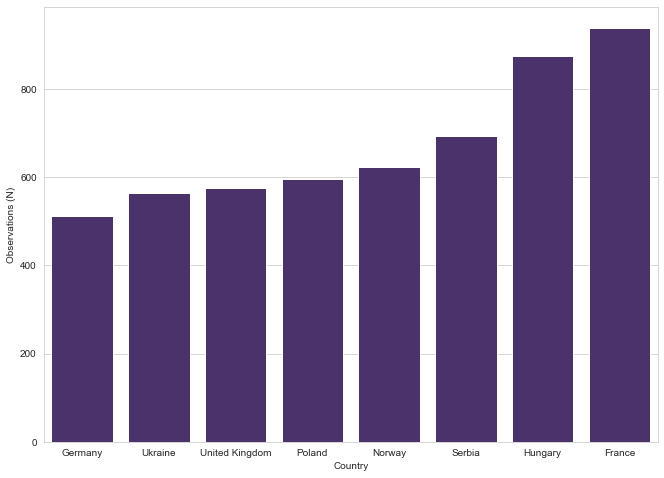

In [60]:
sns.set_palette("viridis")
plt.figure(figsize = (11,8))
sns.barplot(
   x = "Country", y = "Count", data=countries, color = "#4B2974"
)
plt.ylabel('Observations (N)')
plt.savefig("results/country_obs.png")

In [61]:
def sample_table(data, indi, names):
    table = pd.DataFrame()
    for i,n in zip(indi, names):
        sub_table = data.groupby(i)[i].count().reset_index(name='Number')
        sub_table.rename(columns = {i: "Item"}, inplace = True)
        sub_table["Percentage (%)"] = np.nan
        for i in range(len(sub_table)):
            sub_table["Percentage (%)"].iloc[i] = round(sub_table["Number"].iloc[i]/sub_table["Number"].sum()*100)
        name_list = [n]*len(sub_table)
        sub_table.index = name_list
        table = table.append(sub_table)
    return table

table_des = sample_table(data_main, ['S5', "resp_age_bins", "S2", 'income_decile', "S3", "Country", "S6", "H1"], ['Gender', "Age", "Education level", "Income quantile", "Employment status", "Country", "Region", "Home type"])
table_des.to_excel("results/descriptives.xlsx")

C:\Users\T440s\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


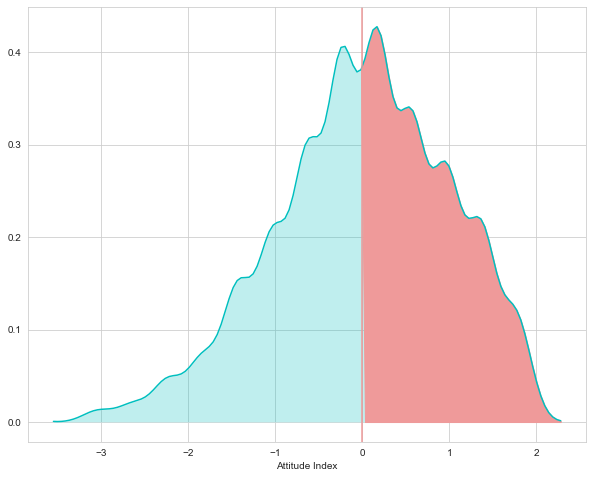

In [62]:
plt.figure(figsize = (10,8))
ax =  sns.distplot(data_main['att_2std'].dropna(),hist=False, color="c", kde_kws={"shade": True})
plt.xlabel("Attitude Index")
kde_x, kde_y = ax.lines[0].get_data()
p1 = plt.axvline(x=0,color='#EF9A9A')
ax.fill_between(kde_x, kde_y, where=(kde_x>0) ,interpolate=True, color='#EF9A9A')

plt.savefig('results/attindexdist.png')

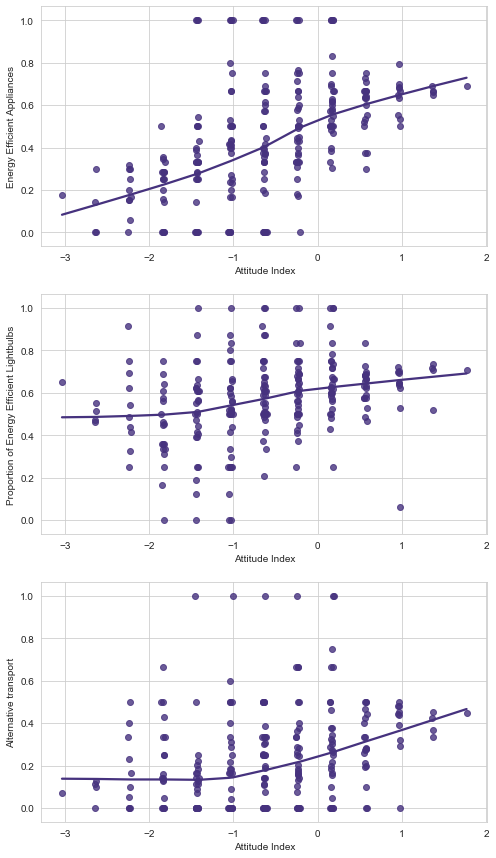

In [63]:
attitude1 = (
    data_main.groupby("att_2std")["green_3"].agg([np.mean, np.std]).reset_index()
)
attitude2 = (
    data_main.groupby("att_2std")["ef_bulbs"].agg([np.mean, np.std]).reset_index()
)
attitude3 = (
    data_main.groupby("att_2std")["green_2"].agg([np.mean, np.std]).reset_index()
)
attitude4 = (
    data_main.groupby("att_2std")["green_1"].agg([np.mean, np.std]).reset_index()
)

sns.set_palette("viridis")
fig, axes = plt.subplots(3, 1, figsize=(8, 15))
for att, r, name in zip(
    [attitude1, attitude2, attitude3, attitude4],
    [0, 1, 2],
    [
        "Energy Efficient Appliances",
        "Proportion of Energy Efficient Lightbulbs",
        "Alternative transport",
        "Efficient car",
    ],
):
    sns.regplot(x="att_2std", y="mean", data=att, lowess=True,ci="sd", ax=axes[r])
    axes[r].set_xlabel("Attitude Index")
    axes[r].set_ylabel(name)

plt.savefig('results/depindep.png')

In [64]:
country_nums = data_main.groupby("Country").agg({"Country": "count"})
country_nums.index = country_nums.index.set_names(["name"])
country_nums.reset_index(inplace=True)

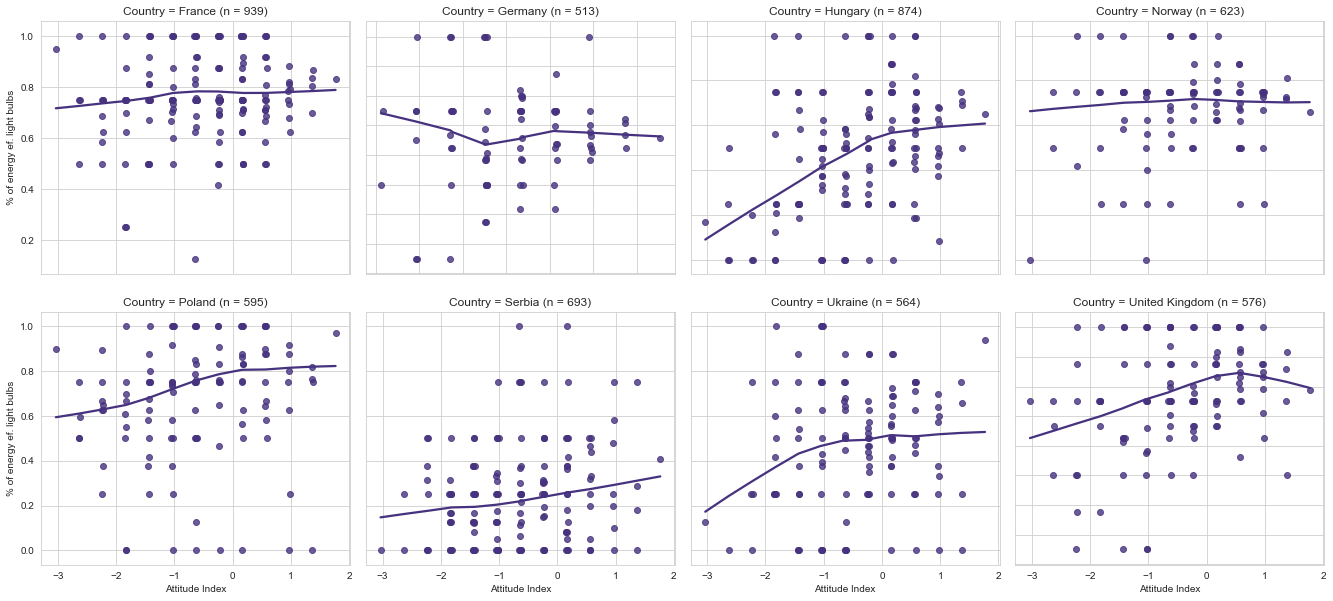

In [65]:
sns.set_palette("viridis")
fig, axes = plt.subplots(2, 4, figsize=(23, 10))
for r, d, c, b in zip(
    [0, 0, 0, 0, 1, 1, 1, 1],
    [0, 1, 2, 3, 0, 1, 2, 3],
    country_nums.name,
    country_nums.Country,
):
    att = (
        data_main[data_main["Country"] == c]
        .groupby(["att_2std"])["ef_bulbs"]
        .agg([np.mean])
        .reset_index()
    )
    sns.regplot(x="att_2std", y="mean", data=att, ax=axes[r, d], lowess=True)
    axes[r, d].set_title("Country = {} (n = {})".format(c, b))
    axes[r, d].set_ylabel("% of energy ef. light bulbs")
    if (r == 1) & (d != 0):
        axes[r, d].set_xlabel("Attitude Index")
        axes[r, d].set_ylabel("")
        axes[r, d].set_yticklabels([])
    elif (r == 1) & (d == 0):
        axes[r, d].set_xlabel("Attitude Index")
    elif (r == 0) & (d != 0):
        axes[r, d].set_ylabel("")
        axes[r, d].set_yticklabels([])
        axes[r, d].set_xlabel("")
        axes[r, d].set_xticklabels([])
    elif (r == 0) & (d == 0):
        axes[r, d].set_xlabel("")
        axes[r, d].set_xticklabels([])

plt.subplots_adjust(wspace=0.05, hspace=0.15)
plt.savefig('results/dep1indep.png')

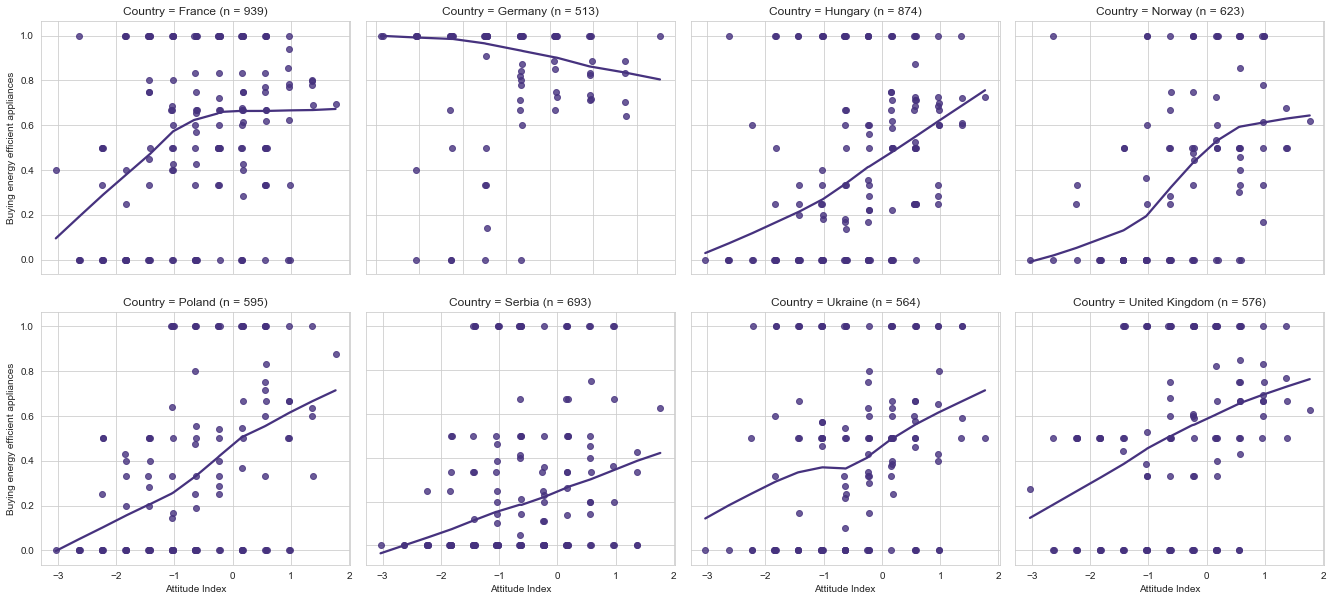

In [66]:
sns.set_palette("viridis")
fig, axes = plt.subplots(2, 4, figsize=(23, 10))
for r, d, c, b in zip(
    [0, 0, 0, 0, 1, 1, 1, 1],
    [0, 1, 2, 3, 0, 1, 2, 3],
    country_nums.name,
    country_nums.Country,
):
    att = (
        data_main[data_main["Country"] == c]
        .groupby(["att_2std"])["green_3"]
        .agg([np.mean])
        .reset_index()
    )
    sns.regplot(x="att_2std", y="mean", data=att, ax=axes[r, d], lowess=True)
    axes[r, d].set_title("Country = {} (n = {})".format(c, b))
    axes[r, d].set_ylabel("Buying energy efficient appliances")
    if (r == 1) & (d != 0):
        axes[r, d].set_xlabel("Attitude Index")
        axes[r, d].set_ylabel("")
        axes[r, d].set_yticklabels([])
    elif (r == 1) & (d == 0):
        axes[r, d].set_xlabel("Attitude Index")
    elif (r == 0) & (d != 0):
        axes[r, d].set_ylabel("")
        axes[r, d].set_yticklabels([])
        axes[r, d].set_xlabel("")
        axes[r, d].set_xticklabels([])
    elif (r == 0) & (d == 0):
        axes[r, d].set_xlabel("")
        axes[r, d].set_xticklabels([])

plt.subplots_adjust(wspace=0.05, hspace=0.15)
plt.savefig('results/dep2indep.png')

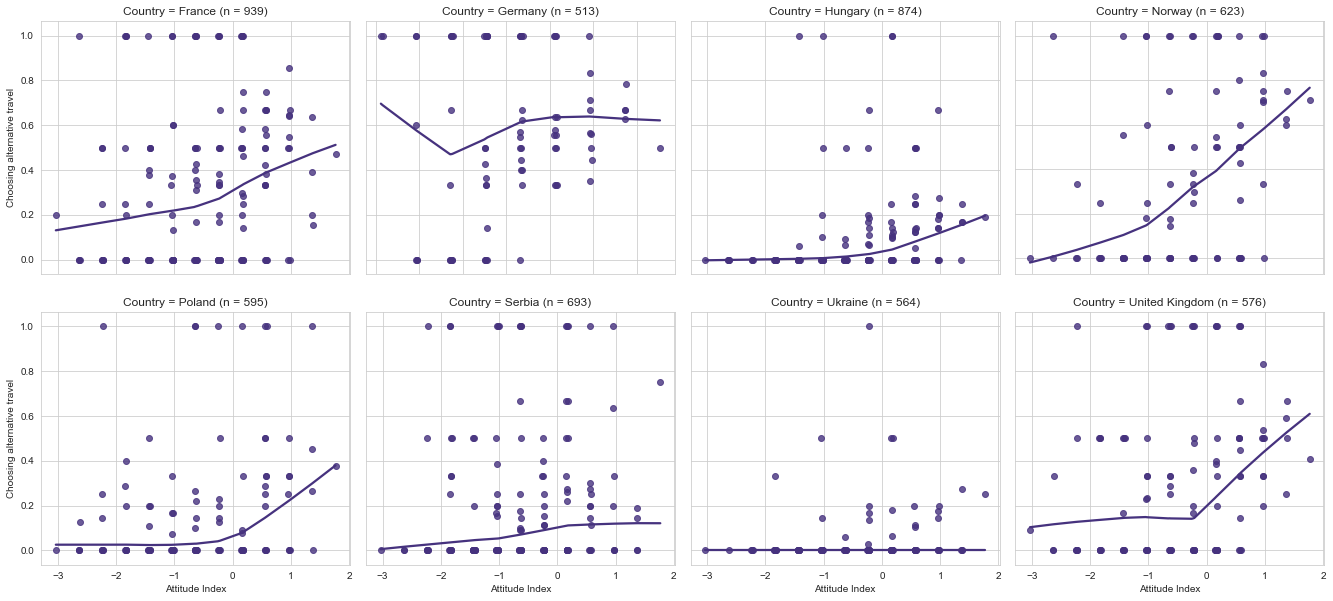

In [67]:
sns.set_palette("viridis")
fig, axes = plt.subplots(2, 4, figsize=(23, 10))
for r, d, c, b in zip(
    [0, 0, 0, 0, 1, 1, 1, 1],
    [0, 1, 2, 3, 0, 1, 2, 3],
    country_nums.name,
    country_nums.Country,
):
    att = (
        data_main[data_main["Country"] == c]
        .groupby(["att_2std"])["green_2"]
        .agg([np.mean])
        .reset_index()
    )
    sns.regplot(x="att_2std", y="mean", data=att, ax=axes[r, d], lowess=True)
    axes[r, d].set_title("Country = {} (n = {})".format(c, b))
    axes[r, d].set_ylabel("Choosing alternative travel")
    if (r == 1) & (d != 0):
        axes[r, d].set_xlabel("Attitude Index")
        axes[r, d].set_ylabel("")
        axes[r, d].set_yticklabels([])
    elif (r == 1) & (d == 0):
        axes[r, d].set_xlabel("Attitude Index")
    elif (r == 0) & (d != 0):
        axes[r, d].set_ylabel("")
        axes[r, d].set_yticklabels([])
        axes[r, d].set_xlabel("")
        axes[r, d].set_xticklabels([])
    elif (r == 0) & (d == 0):
        axes[r, d].set_xlabel("")
        axes[r, d].set_xticklabels([])

plt.subplots_adjust(wspace=0.05, hspace=0.15)
plt.savefig('results/dep3indep.png')

<Figure size 1152x720 with 0 Axes>

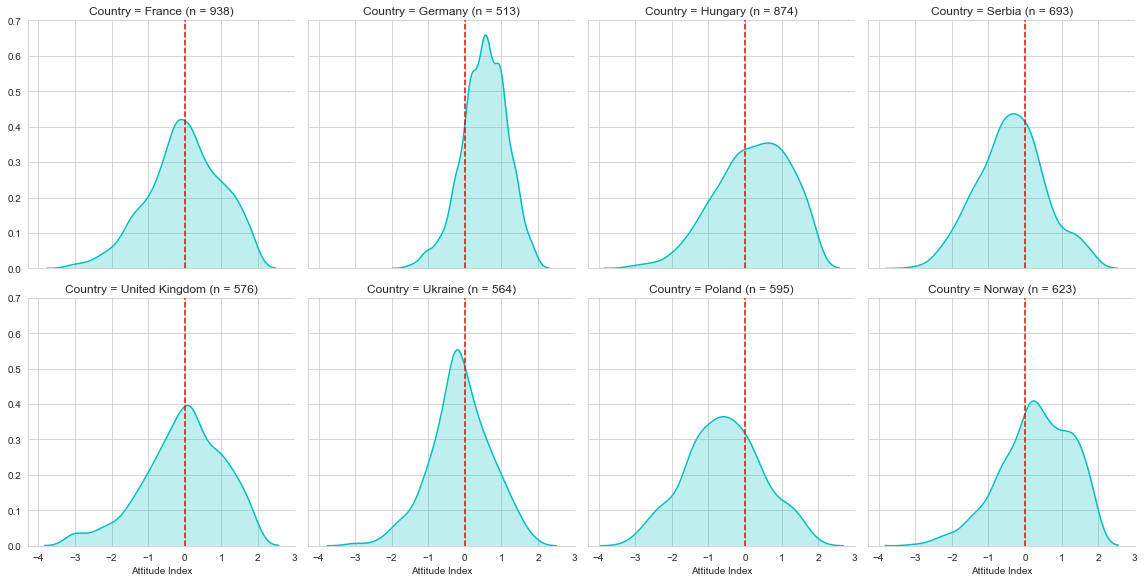

In [68]:
plt.figure(figsize=(16, 10))
bins = 12
g = sns.FacetGrid(data_main, col="Country", col_wrap=4, height=4)
g = g.map(
    sns.distplot,
    "att_2std",
    bins=bins,
    color="c",
    hist=False,
    kde_kws={"shade": True}
)

g.map(plt.axvline, x=0, ls='--', c='red')
        
g.set(ylim=(0, 0.7))

g.axes[0].set_title("Country = France (n = 938)")
g.axes[1].set_title("Country = Germany (n = 513)")
g.axes[2].set_title("Country = Hungary (n = 874)")
g.axes[3].set_title("Country = Serbia (n = 693)")
g.axes[4].set_title("Country = United Kingdom (n = 576)")
g.axes[5].set_title("Country = Ukraine (n = 564)")
g.axes[6].set_title("Country = Poland (n = 595)")
g.axes[7].set_title("Country = Norway (n = 623)")
g.set_xlabels("Attitude Index")
plt.savefig('results/attindexdistcountry.png')

In [69]:
data_poor = data_main[
    (data_main["income_decile"] == "Poor")
    | (data_main["income_decile"] == "Low income")
]
data_rich = data_main[
    (data_main["income_decile"] == "High income")
    | (data_main["income_decile"] == "Upper middle income")
]

km_test_inc = stats.ks_2samp(
    data_poor["att_2std"].dropna(), data_rich["att_2std"].dropna()
)

data_noedu = data_main[(data_main["education"] == 0) | (data_main["education"] == 1) | (data_main["education"] == 2)]
data_edu = data_main[(data_main["education"] == 3) | (data_main["education"] == 4)]

km_test_edu = stats.ks_2samp(
    data_noedu["att_2std"].dropna(), data_edu["att_2std"].dropna()
)

data_young = data_main[data_main['resp_age'] <= 48]
data_old = data_main[data_main['resp_age'] > 48]

km_test_age = stats.ks_2samp(
    data_young["att_2std"].dropna(), data_old["att_2std"].dropna()
)

data_male = data_main[data_main['gender'] == 0]
data_female = data_main[data_main['gender'] == 1]

km_test_gender = stats.ks_2samp(
    data_male["att_2std"].dropna(), data_female["att_2std"].dropna()
)

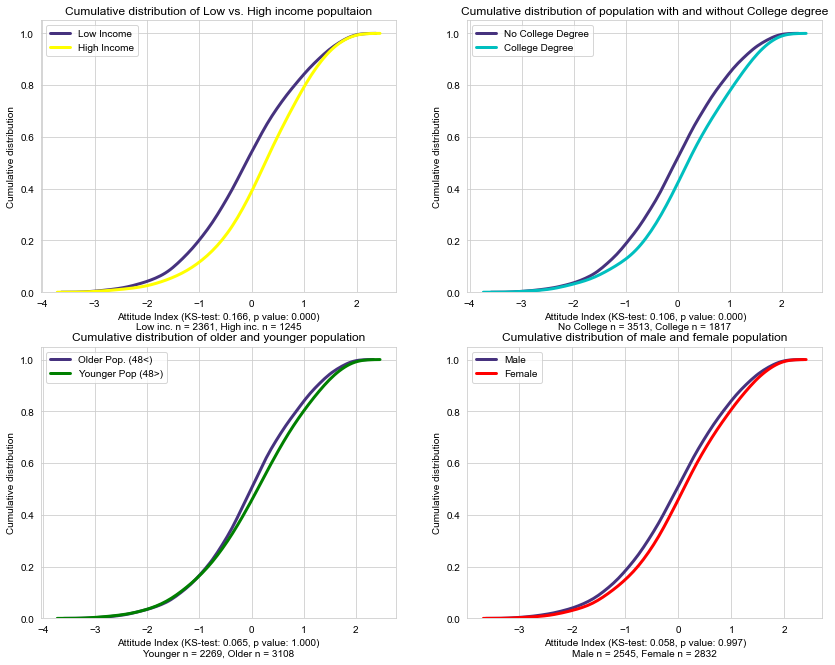

In [93]:
fig, axes = plt.subplots(2, 2, figsize=(14, 11))

sns.distplot(
    data_poor["att_2std"].dropna(),
    hist=False,
    kde_kws={"cumulative": True, "linewidth": 3},
    ax=axes[0,0],
    label = 'Low Income'
)
sns.distplot(
    data_rich["att_2std"].dropna(),
    hist=False,
    kde_kws={"cumulative": True, "linewidth": 3},
    ax=axes[0,0],
    color="yellow",
    label= 'High Income'
)

axes[0,0].set_xlabel(
    "Attitude Index (KS-test: {:.3f}, p value: {:.3f})\nLow inc. n = {}, High inc. n = {}".format(
        km_test_inc[0], km_test_inc[1], len(data_poor), len(data_rich)
    )
)
axes[0,0].set_ylabel("Cumulative distribution")

axes[0,0].set_title("Cumulative distribution of Low vs. High income popultaion")


axes[0,0].legend(loc="upper left")

#########################

sns.distplot(
    data_noedu["att_2std"].dropna(),
    hist=False,
    kde_kws={"cumulative": True, "linewidth": 3},
    ax=axes[0,1],
    label = 'No College Degree'
)
sns.distplot(
    data_edu["att_2std"].dropna(),
    hist=False,
    kde_kws={"cumulative": True, "linewidth": 3},
    ax=axes[0,1],
    color="c",
    label = 'College Degree'
)

axes[0,1].set_xlabel(
    "Attitude Index (KS-test: {:.3f}, p value: {:.3f})\nNo College n = {}, College n = {}".format(
        km_test_edu[0], km_test_edu[1], len(data_noedu), len(data_edu)
    )
)
axes[0,1].set_ylabel("Cumulative distribution")

axes[0,1].set_title("Cumulative distribution of population with and without College degree")
axes[0,1].legend(loc="upper left")

#########################

sns.distplot(
    data_old["att_2std"].dropna(),
    hist=False,
    kde_kws={"cumulative": True, "linewidth": 3},
    ax=axes[1,0],
    label = 'Older Pop. (48<)'
)
sns.distplot(
    data_young["att_2std"].dropna(),
    hist=False,
    kde_kws={"cumulative": True, "linewidth": 3},
    ax=axes[1,0],
    color="g",
    label = 'Younger Pop (48>)'
)

axes[1,0].set_xlabel(
    "Attitude Index (KS-test: {:.3f}, p value: {:.3f})\nYounger n = {}, Older n = {}".format(
        km_test_age[0], km_test_age[1], len(data_young), len(data_old)
    )
)
axes[1,0].set_ylabel("Cumulative distribution")

axes[1,0].set_title("Cumulative distribution of older and younger population")
axes[1,0].legend(loc="upper left")

#########################

sns.distplot(
    data_male["att_2std"].dropna(),
    hist=False,
    kde_kws={"cumulative": True, "linewidth": 3},
    ax=axes[1,1],
    label = 'Male'
)
sns.distplot(
    data_female["att_2std"].dropna(),
    hist=False,
    kde_kws={"cumulative": True, "linewidth": 3},
    ax=axes[1,1],
    color="r",
    label = 'Female'
)

axes[1,1].set_xlabel(
    "Attitude Index (KS-test: {:.3f}, p value: {:.3f})\nMale n = {}, Female n = {}".format(
        km_test_gender[0], km_test_gender[1], len(data_male), len(data_female)
    )
)
axes[1,1].set_ylabel("Cumulative distribution")

axes[1,1].set_title("Cumulative distribution of male and female population")
axes[1,1].legend(loc="upper left")

plt.savefig('results/attindexcovar.png')

### Dependent variable

**Cronbach alpha test on dependent variables to be merged**

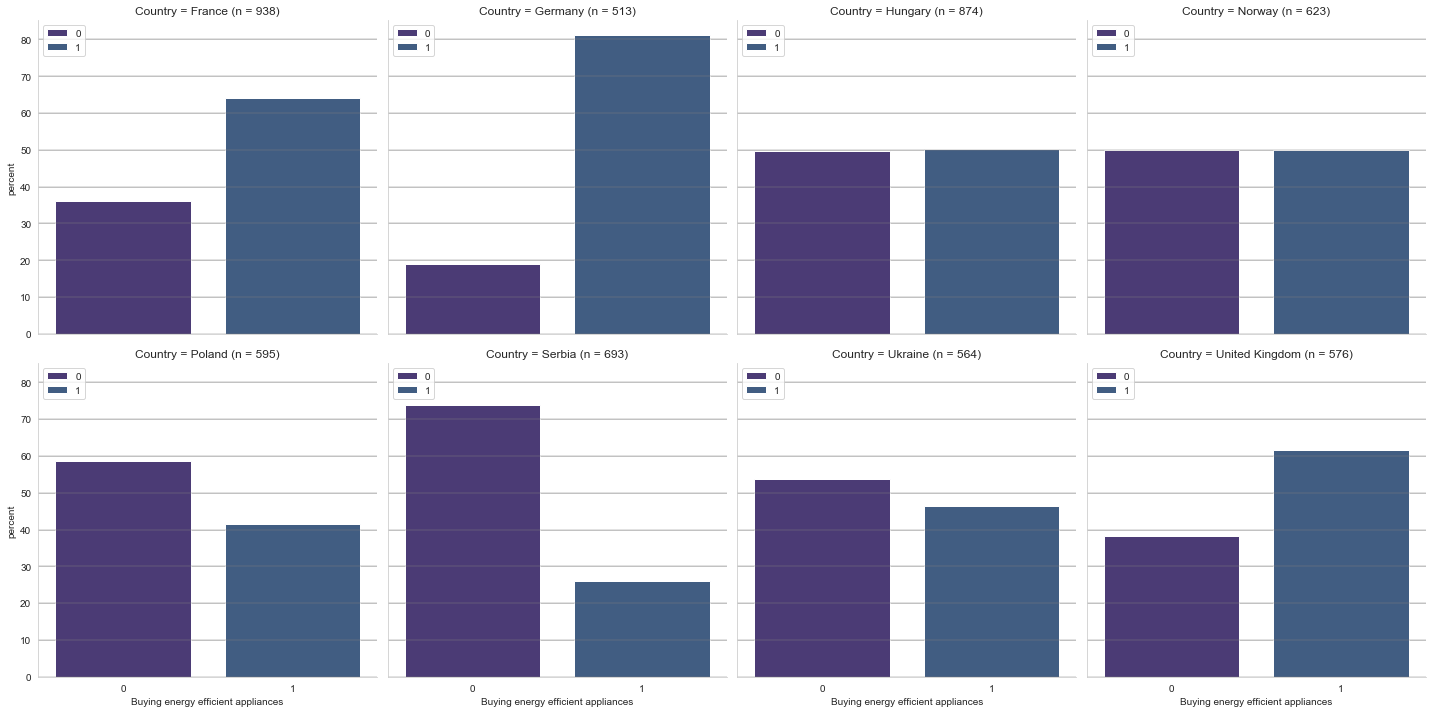

In [71]:
g_green3 = data_main.groupby("Country")["green_3"].value_counts(normalize=True)
g_green3 = g_green3.mul(100)
g_green3 = g_green3.rename("percent").reset_index()


g = sns.catplot(
    x="green_3", y="percent", col="Country", col_wrap=4, data=g_green3, kind="bar", hue="green_3",dodge=False
)

#plt.figure(figsize = (25,15))

#g.add_legend()
for a in g.axes:
    for gri in range(9):
        a.axhline(a.get_yticks()[gri], alpha=0.3, color="grey")
    a.legend(loc="upper left")

g.axes[0].set_title("Country = France (n = 938)")
g.axes[1].set_title("Country = Germany (n = 513)")
g.axes[2].set_title("Country = Hungary (n = 874)")
g.axes[3].set_title("Country = Norway (n = 623)")
g.axes[4].set_title("Country = Poland (n = 595)")
g.axes[5].set_title("Country = Serbia (n = 693)")
g.axes[6].set_title("Country = Ukraine (n = 564)")
g.axes[7].set_title("Country = United Kingdom (n = 576)")

g.set_xlabels("Buying energy efficient appliances")
plt.savefig('results/dep1country.png')

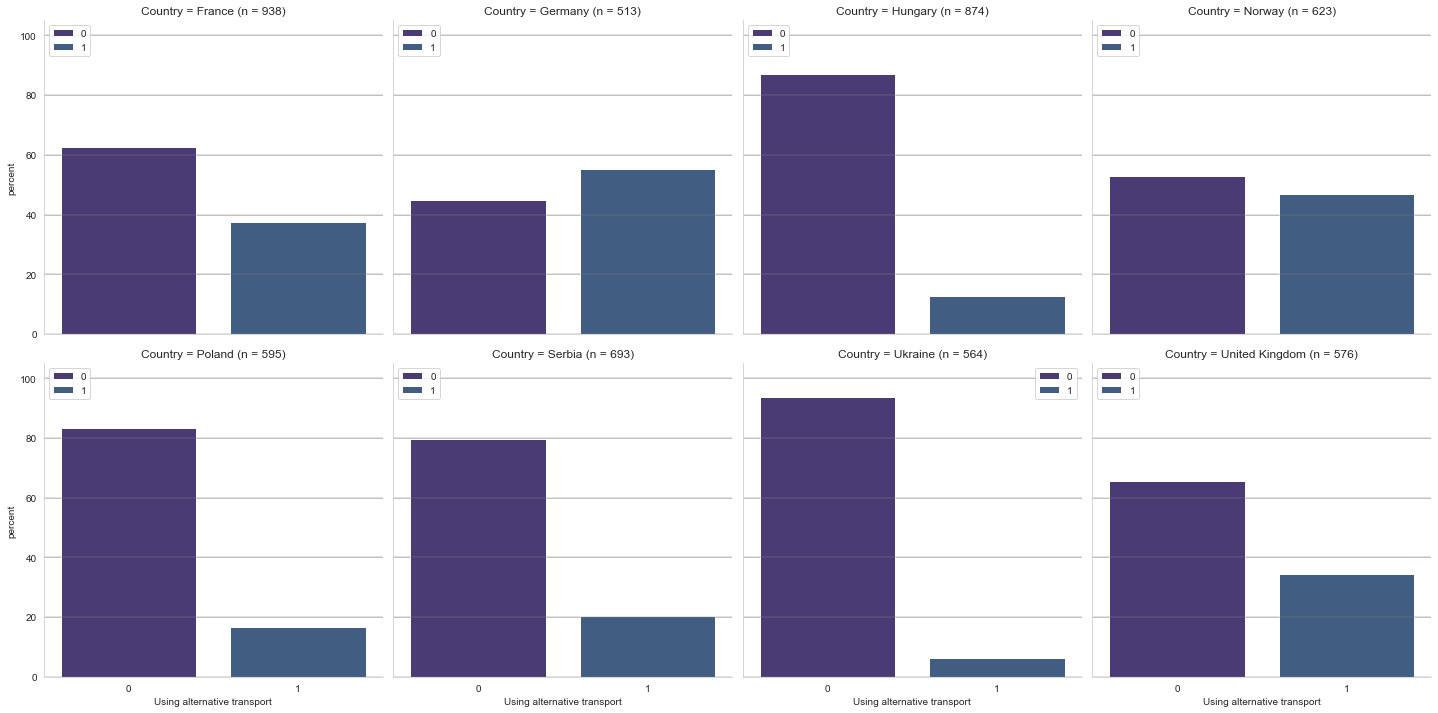

In [72]:
g_green2 = data_main.groupby("Country")["green_2"].value_counts(normalize=True)
g_green2 = g_green2.mul(100)
g_green2 = g_green2.rename("percent").reset_index()

g = sns.catplot(
    x="green_2", y="percent", col="Country", col_wrap=4, data=g_green2, kind="bar", hue="green_2", dodge = False
)

b = 0
for a in g.axes:

    for gri in range(6):
        a.axhline(a.get_yticks()[gri], alpha=0.3, color="grey")
    a.legend(loc="upper left")
    if b == 6:
        a.legend(loc="upper right")
    b+=1
        

g.axes[0].set_title("Country = France (n = 938)")
g.axes[1].set_title("Country = Germany (n = 513)")
g.axes[2].set_title("Country = Hungary (n = 874)")
g.axes[3].set_title("Country = Norway (n = 623)")
g.axes[4].set_title("Country = Poland (n = 595)")
g.axes[5].set_title("Country = Serbia (n = 693)")
g.axes[6].set_title("Country = Ukraine (n = 564)")
g.axes[7].set_title("Country = United Kingdom (n = 576)")

#g = sns.FacetGrid(tips, col="time",  hue="smoker")
g.set_xlabels("Using alternative transport")
plt.savefig('results/dep2country.png')

In [73]:
# plt.figure(figsize = (16,10))
# g = sns.FacetGrid(data_main, col="Country", col_wrap=4, height=4)
# g = g.map(sns.countplot, "green_1")
# g.set_xlabels("Buying efficient car")

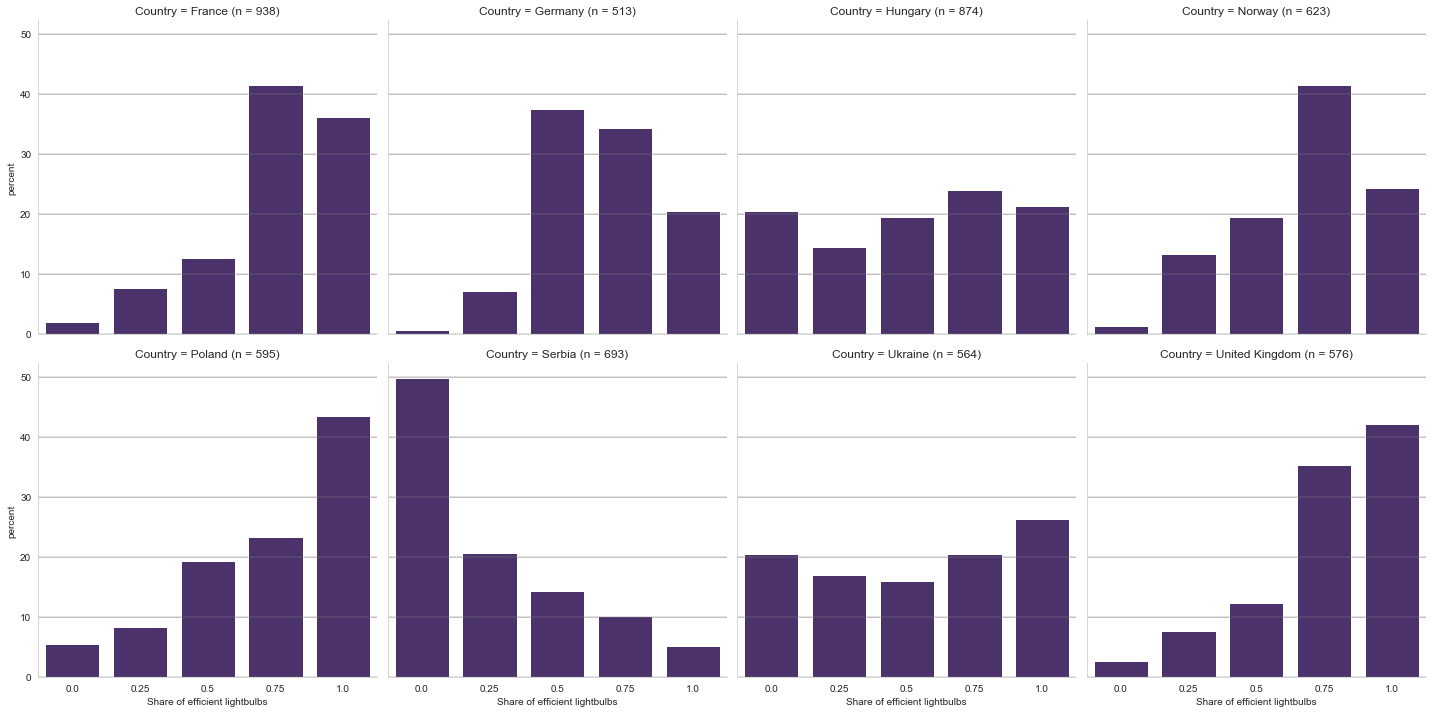

In [74]:
g_ef = data_main.groupby("Country")["ef_bulbs"].value_counts(normalize=True)
g_ef = g_ef.mul(100)
g_ef = g_ef.rename("percent").reset_index()

g = sns.catplot(
    x="ef_bulbs", y="percent", col="Country", col_wrap=4, color = "#4B2974", data=g_ef, kind="bar"
)

for a in g.axes:
    for gri in range(6):
        a.axhline(a.get_yticks()[gri], alpha=0.3, color="grey")

g.axes[0].set_title("Country = France (n = 938)")
g.axes[1].set_title("Country = Germany (n = 513)")
g.axes[2].set_title("Country = Hungary (n = 874)")
g.axes[3].set_title("Country = Norway (n = 623)")
g.axes[4].set_title("Country = Poland (n = 595)")
g.axes[5].set_title("Country = Serbia (n = 693)")
g.axes[6].set_title("Country = Ukraine (n = 564)")
g.axes[7].set_title("Country = United Kingdom (n = 576)")

g.set_xlabels("Share of efficient lightbulbs")
plt.savefig('results/dep3country.png')

In [75]:
data_main["ef_bulbs_bin"] = np.where(data_main["ef_bulbs"] <= 0.5, 0, 1)
data_main["education_bin"] = np.where(data_main["education"] <= 2, 0, 1)
data_main.loc[data_main["education"].isna(), "education_bin"] = np.nan

pd.set_option("display.precision", 3)


def t_table01(data, var, indi):
    df_all = pd.DataFrame()
    t_s = []
    p_s = []
    diffs = []
    for i in indi:
        df = data.groupby(var)[i].agg(np.mean).T
        diffs.append(df[0] - df[1])
        t, p = ttest_ind(
            data[data[var] == 0][i], data[data[var] == 1][i], nan_policy="omit"
        )
        t_s.append(t)
        p_s.append("{:,.3f}".format(p))
        df_all = df_all.append(df)

    df_all["difference"] = diffs
    df_all["p value"] = p_s
    # df_all.rename(columns = {0: '{}: 0'.format(var), 1:'{}: 1'.format(var)}, inplace =True)

    return df_all


t_tests = pd.DataFrame()
df = {}
dependents = ["green_2", "green_3", "ef_bulbs_bin"]
dep_names = [
    "Using alternative transport",
    "Buying efficient appliances",
    "Share of ef. bulbs (50% cut-off)",
]
for dep, i in zip(dependents, dep_names):
    df[i] = t_table01(
        data_main[data_main['resp_age']>30],
        dep,
        [
            "education_bin",
            "income_dec_num10",
            "gender",
            "resp_age",
            "household_members",
            "children",
            "elderly",
            "house_big",
            "before_1990",
            "appliance_age_avg",
            "rural",
            "detached",
        ],
    )

t_tests = pd.concat([t_tests, pd.concat(df, axis=1)], axis=1)

In [76]:
t_tests

Using alternative transport                             \
                                            0       1 difference p value   
education_bin                           0.297   0.447     -0.150   0.000   
income_dec_num10                        4.463   5.323     -0.860   0.000   
gender                                  0.531   0.507      0.025   0.111   
resp_age                               53.937  52.638      1.299   0.003   
household_members                       2.664   2.689     -0.025   0.575   
children                                0.654   0.724     -0.070   0.018   
elderly                                 0.607   0.621     -0.013   0.570   
house_big                               0.405   0.452     -0.047   0.002   
before_1990                             0.770   0.726      0.044   0.001   
appliance_age_avg                       2.009   1.839      0.170   0.000   
rural                                   0.721   0.567      0.154   0.000   
detached                                0.516   0.395      0.120   0.000   

                  Buying efficient appliances                             \
                                            0       1 difference p value   
education_bin                           0.292   0.381     -0.090   0.000   
income_dec_num10                        4.319   5.047     -0.727   0.000   
gender                                  0.514   0.534     -0.020   0.147   
resp_age                               53.795  53.375      0.420   0.283   
household_members                       2.650   2.689     -0.039   0.341   
children                                0.637   0.707     -0.070   0.008   
elderly                                 0.615   0.607      0.008   0.701   
house_big                               0.379   0.454     -0.075   0.000   
before_1990                             0.781   0.737      0.044   0.000   
appliance_age_avg                       2.074   1.860      0.214   0.000   
rural                                   0.672   0.684     -0.012   0.341   
detached                                0.490   0.475      0.015   0.293   

                  Share of ef. bulbs (50% cut-off)                             
                                                 0       1 difference p value  
education_bin                                0.247   0.409     -0.162   0.000  
income_dec_num10                             4.452   4.893     -0.441   0.000  
gender                                       0.538   0.514      0.024   0.080  
resp_age                                    54.927  52.527      2.401   0.000  
household_members                            2.643   2.692     -0.049   0.227  
children                                     0.539   0.778     -0.239   0.000  
elderly                                      0.570   0.642     -0.072   0.001  
house_big                                    0.376   0.451     -0.075   0.000  
before_1990                                  0.802   0.724      0.078   0.000  
appliance_age_avg                            2.109   1.847      0.262   0.000  
rural                                        0.691   0.669      0.022   0.091  
detached                                     0.523   0.450      0.074   0.000

In [77]:
t_tests.to_excel('results/depvar_ttest.xlsx')

In [78]:
data_main['T3'] = data_main['T3'].astype('str')
data_main['T2'] = data_main['T2'].astype('str')
data_main['M1A'] = data_main['M1A'].astype('str')
data_main['M1B'] = data_main['M1B'].astype('str')
data_main['M1C'] = data_main['M1C'].astype('str')
data_main['M1C'] = data_main['M1D'].astype('str')
data_main.to_stata("data/main_data.dta")

C:\Users\T440s\anaconda3\lib\site-packages\pandas\io\stata.py:632: ValueLabelTypeMismatch: 
Stata value labels (pandas categories) must be strings. Column M1D contains
non-string labels which will be converted to strings.  Please check that the
Stata data file created has not lost information due to duplicate labels.

  ValueLabelTypeMismatch,
C:\Users\T440s\anaconda3\lib\site-packages\pandas\io\stata.py:632: ValueLabelTypeMismatch: 
Stata value labels (pandas categories) must be strings. Column M1E contains
non-string labels which will be converted to strings.  Please check that the
Stata data file created has not lost information due to duplicate labels.

  ValueLabelTypeMismatch,
C:\Users\T440s\anaconda3\lib\site-packages\pandas\io\stata.py:632: ValueLabelTypeMismatch: 
Stata value labels (pandas categories) must be strings. Column M4A contains
non-string labels which will be converted to strings.  Please check that the
Stata data file created has not lost information due to duplica

### Visualisation for Defense

In [79]:
import matplotlib as mpl
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

Text(0.5, 1.0, 'Income group of respondents')

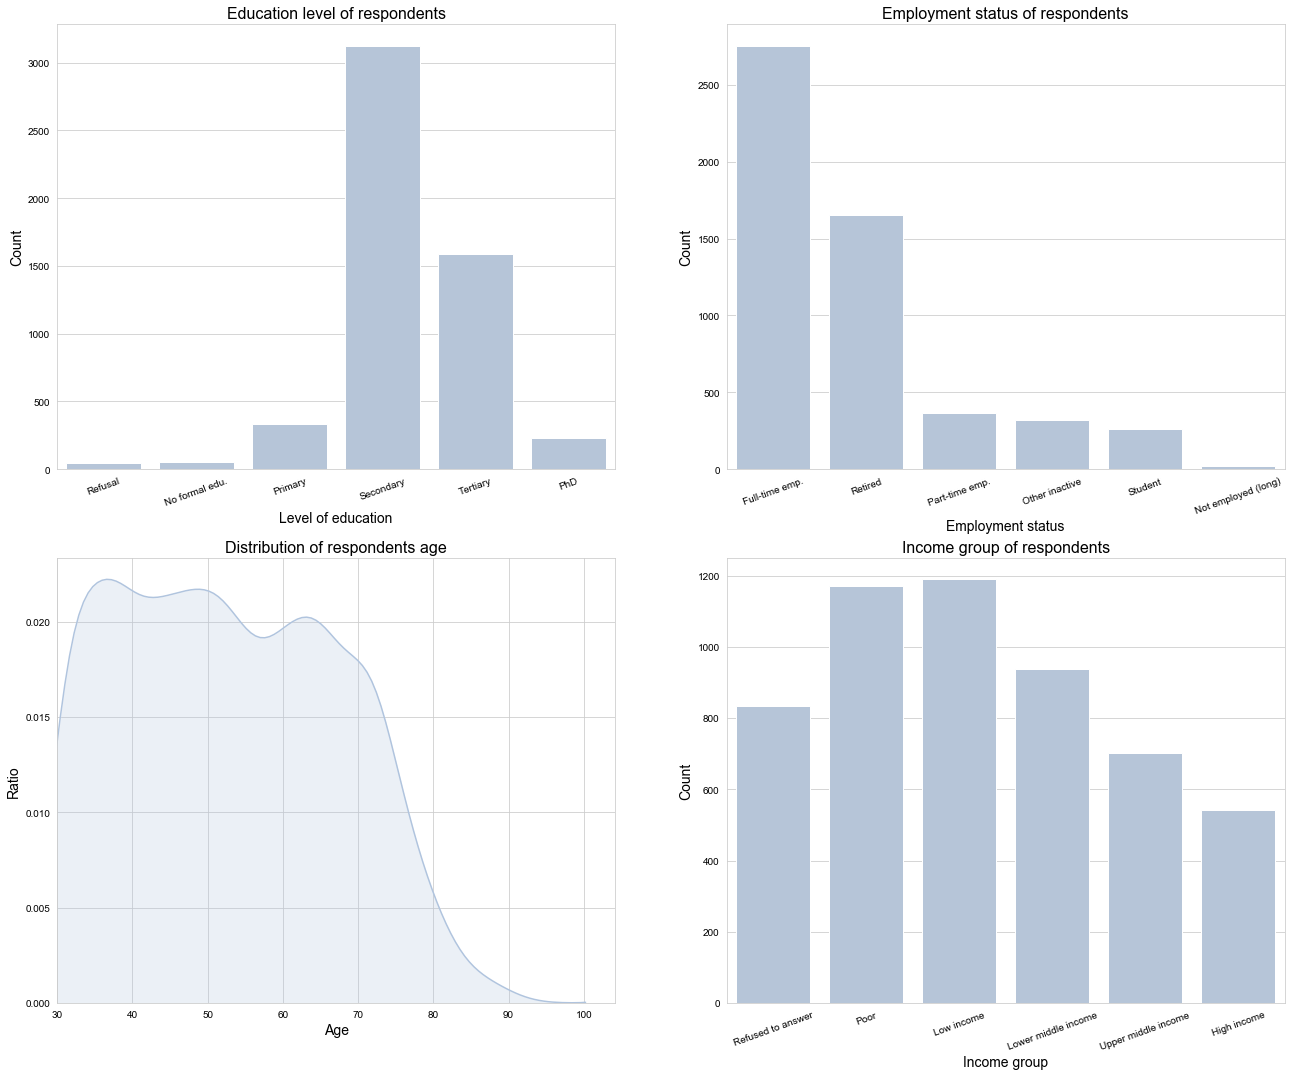

In [80]:
fig, axs = plt.subplots(2, 2, figsize=(22, 18))
sns.countplot(
    x="S2",
    data=data_main,
    order=[
        "Do not know / Refusal",
        "No formal education or below primary",
        "Primary education",
        "Secondary  and post-secondary non-tertiary education",
        "Tertiary education first stage, i.e. bachelor or master",
        "Tertiary education second stage (PhD)",
    ],
    ax=axs[0, 0],
    color="lightsteelblue",
)
axs[0, 0].set_xticklabels(
    ["Refusal", "No formal edu.", "Primary", "Secondary", "Tertiary", "PhD"],
    rotation=20,
)
axs[0, 0].set_ylabel("Count", fontsize = 14)
axs[0, 0].set_xlabel("Level of education", fontsize = 14)
axs[0, 0].set_title("Education level of respondents", fontsize=16)

sns.countplot(
    x="S3",
    data=data_main,
    order=data_main["S3"].value_counts().index,
    ax=axs[0, 1],
    color="lightsteelblue",
)
axs[0, 1].set_xticklabels(
    [
        "Full-time emp.",
        "Retired",
        "Part-time emp.",
        "Other inactive",
        "Student",
        "Not employed (long)",
        "Refuse",
    ],
    rotation=20,
)
axs[0, 1].set_ylabel("Count", fontsize = 14)
axs[0, 1].set_xlabel("Employment status", fontsize = 14)
axs[0, 1].set_title("Employment status of respondents", fontsize=16)

sns.distplot(
    data_main["resp_age"].dropna(),
    ax=axs[1, 0],
    hist=False,
    color="lightsteelblue",
    kde_kws={"shade": True},
)
axs[1, 0].set_xlim(left=30)
axs[1, 0].set_xlabel("Age", fontsize = 14)
axs[1, 0].set_ylabel("Ratio", fontsize = 14)
axs[1, 0].set_title("Distribution of respondents age", fontsize=16)

sns.countplot(
    x="income_decile",
    data=data_main,
    order=[
        "Refused to answer",
        "Poor",
        "Low income",
        "Lower middle income",
        "Upper middle income",
        "High income",
    ],
    color="lightsteelblue",
)
axs[1, 1].set_xticklabels(
    [
        "Refused to answer",
        "Poor",
        "Low income",
        "Lower middle income",
        "Upper middle income",
        "High income",
    ],
    rotation=20,
)
axs[1, 1].set_ylabel("Count", fontsize = 14)
axs[1, 1].set_xlabel("Income group", fontsize = 14)
axs[1, 1].set_title("Income group of respondents", fontsize=16)

Text(0.5, 1.0, 'Home type of respondents')

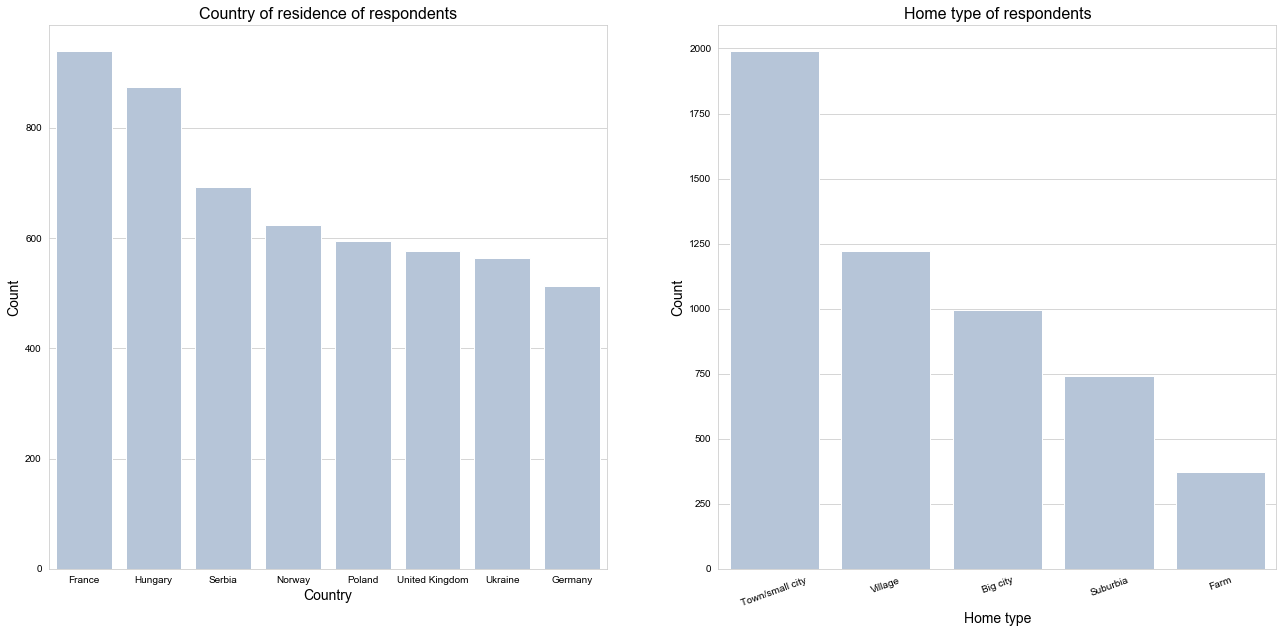

In [81]:
countries = (
    data_main.groupby("Country")["Country"]
    .count()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending=False)
)

fig, axs = plt.subplots(1, 2, figsize=(22, 10))
sns.barplot(x="Country", y="Count", data=countries, color="lightsteelblue", ax=axs[0])
axs[0].set_ylabel("Count", fontsize=14)
axs[0].set_xlabel("Country", fontsize=14)
axs[0].set_title("Country of residence of respondents", fontsize=16)

sns.countplot(
    x="S6",
    data=data_main,
    order=data_main["S6"].value_counts().index,
    ax=axs[1],
    color="lightsteelblue",
)
axs[1].set_xticklabels(
    ["Town/small city", "Village", "Big city", "Suburbia", "Farm", "Refuse"],
    rotation=20,
)
axs[1].set_ylabel("Count", fontsize=14)
axs[1].set_xlabel("Home type", fontsize=14)
axs[1].set_title("Home type of respondents", fontsize=16)

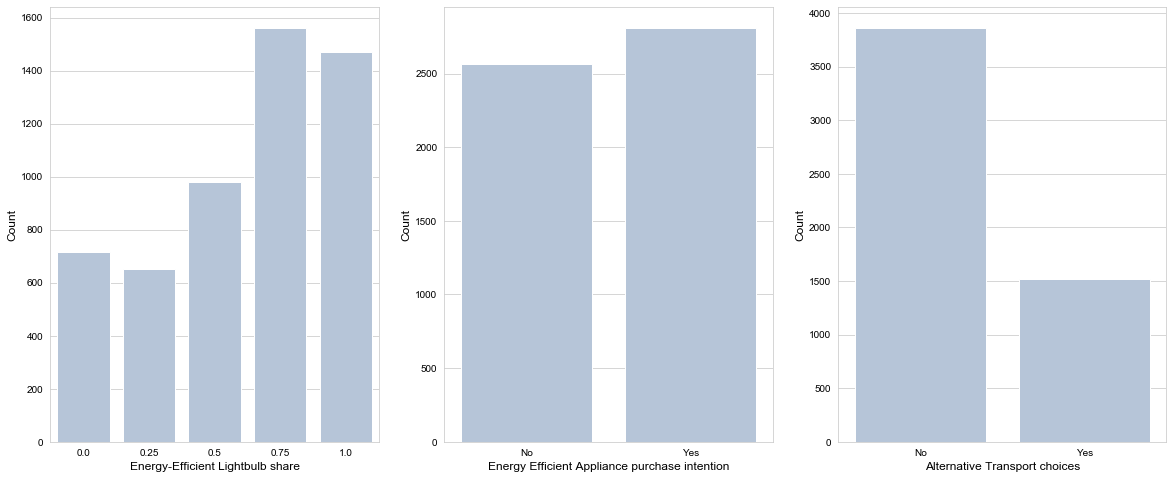

In [82]:
fig, axs = plt.subplots(1,3, figsize=(20, 8))

sns.countplot(
    x="ef_bulbs",
    data=data_main, ax = axs[0], palette=['lightsteelblue'])

axs[0].set_ylabel("Count", fontsize=12)
axs[0].set_xlabel("Energy-Efficient Lightbulb share", fontsize=12)

sns.countplot(
    x="green_3",
    data=data_main, ax = axs[1], palette=['lightsteelblue'])

axs[1].set_xticklabels(
    ["No", "Yes"],
)
axs[1].set_ylabel("Count", fontsize=12)
axs[1].set_xlabel("Energy Efficient Appliance purchase intention", fontsize=12)

sns.countplot(
    x="green_2",
    data=data_main, ax = axs[2], palette=['lightsteelblue'])

axs[2].set_xticklabels(
    ["No", "Yes"],
)
axs[2].set_ylabel("Count", fontsize=12)
axs[2].set_xlabel("Alternative Transport choices", fontsize=12);

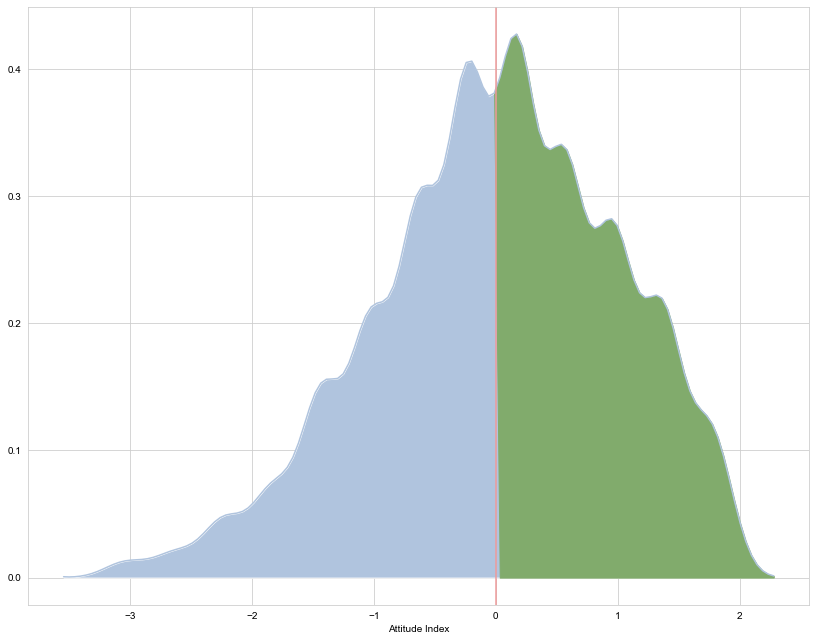

In [92]:
plt.figure(figsize=(14, 11))
ax = sns.distplot(
    data_main["att_2std"].dropna(),
    hist=False,
    color="lightsteelblue",
    kde_kws={"shade": True, "alpha": None},
)
plt.xlabel("Attitude Index")
kde_x, kde_y = ax.lines[0].get_data()
p1 = plt.axvline(x=0, color="#EF9A9A")
ax.fill_between(kde_x, kde_y, where=(kde_x > 0), interpolate=True, color="#81ab6c")

plt.savefig("results/attindexdist.png")

<Figure size 1296x576 with 0 Axes>

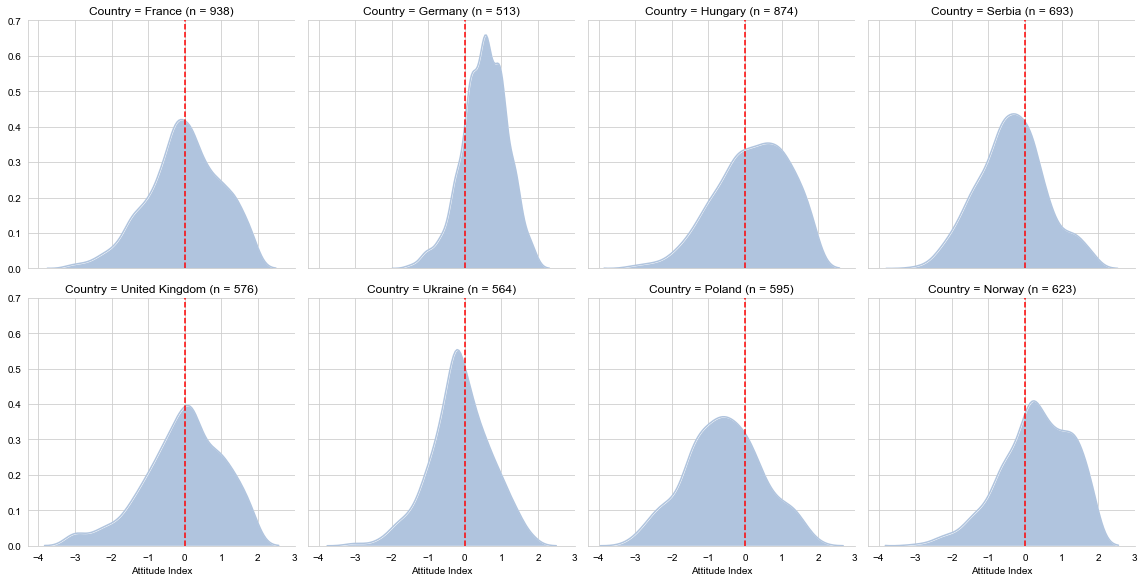

In [88]:
plt.figure(figsize=(18,8))
bins = 12
g = sns.FacetGrid(data_main, col="Country", col_wrap=4, height=4)
g = g.map(
    sns.distplot,
    "att_2std",
    bins=bins,
    color="lightsteelblue",
    hist=False,
    kde_kws={"shade": True,"alpha":None}
)

g.map(plt.axvline, x=0, ls='--', c='red')
        
g.set(ylim=(0, 0.7))

g.axes[0].set_title("Country = France (n = 938)")
g.axes[1].set_title("Country = Germany (n = 513)")
g.axes[2].set_title("Country = Hungary (n = 874)")
g.axes[3].set_title("Country = Serbia (n = 693)")
g.axes[4].set_title("Country = United Kingdom (n = 576)")
g.axes[5].set_title("Country = Ukraine (n = 564)")
g.axes[6].set_title("Country = Poland (n = 595)")
g.axes[7].set_title("Country = Norway (n = 623)")
g.set_xlabels("Attitude Index")